Portuguse version: https://bit.ly/2y04JMS

Dataset by: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

# Changelog

v1.0 

*   Initial Version



[v1.0.1](https://github.com/Luscahm/covid_prediction/tree/V1.0.1)


*   Bugs fix   

[v1.1](git.com.br) 
*   Enhanced Brazil predict of cases and death
*   Texts translated to english
*   Delete useless imports
*   Bugs fix



In [0]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.style.use('seaborn-darkgrid')

# Data Reading


---



* Transform the csv available on Git into a pandas dataframe
*   Split in 4 Dataframe: 
      1.   Brazil
      2.   US
      3.   Sweden
      4.   Italy


*   Remove parts of the dataframe that will not be used
*   we will use 3 dataframe for each country: Confirmed, Deaths and Recovered









In [0]:
url_confirmados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_mortes = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recuperados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_confirmados = pd.read_csv(url_confirmados)
df_mortes = pd.read_csv(url_mortes)
df_recuperados = pd.read_csv(url_recuperados)

In [3]:
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,281,299,349,367,423,444,484,521,555,607
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,304,333,361,377,383,400,409,416,433,446
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,439,466,501,525,545,564,583,601,601,638
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,10,14,16,17,19,19,19,19,19


In [0]:
# separando os dataframes globais em dataframes locais

df_confirmados_brasil = df_confirmados.loc[df_confirmados['Country/Region'] == 'Brazil'].copy()
df_confirmados_italia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Italy'].copy()
df_confirmados_eua = df_confirmados.loc[df_confirmados['Country/Region'] == 'US'].copy()
df_confirmados_suecia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_mortes_brasil = df_mortes.loc[df_mortes['Country/Region'] == 'Brazil'].copy()
df_mortes_italia = df_mortes.loc[df_mortes['Country/Region'] == 'Italy'].copy()
df_mortes_eua = df_mortes.loc[df_mortes['Country/Region'] == 'US'].copy()
df_mortes_suecia = df_mortes.loc[df_mortes['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_recuperados_brasil = df_recuperados.loc[df_recuperados['Country/Region'] == 'Brazil'].copy()
df_recuperados_italia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Italy'].copy()
df_recuperados_eua = df_recuperados.loc[df_recuperados['Country/Region'] == 'US'].copy()
df_recuperados_suecia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Sweden'].copy()

In [5]:
df_confirmados_brasil.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192


In [6]:
df_confirmados_italia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363


In [7]:
df_confirmados_eua.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,275586,308853,337072,366667,396223,429052,461437,496535,526396,555313


In [8]:
df_confirmados_suecia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
205,NaN,Sweden,63.0,16.0,0,0,0,0,0,0,...,6131,6443,6830,7206,7693,8419,9141,9685,10151,10483


In [0]:
# Making all dataframes started 1 day after 1º case of covid
df_confirmados_brasil = df_confirmados_brasil.iloc[:,39:]
df_confirmados_eua = df_confirmados_eua.iloc[:,4:]
df_confirmados_italia = df_confirmados_italia.iloc[:,12:]
df_confirmados_suecia = df_confirmados_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_mortes_brasil = df_mortes_brasil.iloc[:,39:]
df_mortes_eua = df_mortes_eua.iloc[:,4:]
df_mortes_italia = df_mortes_italia.iloc[:,12:]
df_mortes_suecia = df_mortes_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_recuperados_brasil = df_recuperados_brasil.iloc[:,39:]
df_recuperados_eua = df_recuperados_eua.iloc[:,4:]
df_recuperados_italia = df_recuperados_italia.iloc[:,12:]
df_recuperados_suecia = df_recuperados_suecia.iloc[:,13:]

# Data Processing

 Machine learning algorithm does not accept dates in the MM/DD/YY format, we will perform some treatments in these dataframes to get what we want, we will perform the following steps:


*  Extract columns index
*   Extract case numbers from each country
*   transform dates into calendar days, 1st day of covid = 0, second = 1 ...
*   Choose how many calendar days in the future we want to make the prediction
*   Transform the calendar days to mm/dd/yy format
*   Transpose all dataframes










In [0]:
# Geting the index columns
index_brasil = list(df_confirmados_brasil.columns.values) 
index_italia = list(df_confirmados_italia.columns.values) 
index_eua = list(df_confirmados_eua.columns.values) 
index_suecia = list(df_confirmados_suecia.columns.values) 

In [0]:
# geting  values ​​of all brazil df to assist in the construction of graphics:
casos_brasil = []
mortes_brasil = []
recuperados_brasil = []
for i in index_brasil:
    confirmados_brasil = df_confirmados_brasil[i].sum()
    casos_brasil.append(confirmados_brasil)
    
    mortos_brasil = df_mortes_brasil[i].sum()
    mortes_brasil.append(mortos_brasil)
    
    recupera_brasil = df_recuperados_brasil[i].sum()
    recuperados_brasil.append(recupera_brasil)

In [0]:
# making the same for us
casos_eua = []
mortes_eua = []
recuperados_eua = []

for i in index_eua:
    confirmados_eua = df_confirmados_eua[i].sum()
    casos_eua.append(confirmados_eua)
    
    mortos_eua = df_mortes_eua[i].sum()
    mortes_eua.append(mortos_eua)

    recupera_eua = df_recuperados_eua[i].sum()
    recuperados_eua.append(recupera_eua)


In [0]:
# making the same for Italy
casos_italia = []
mortes_italia = []
recuperados_italia = []

for i in index_italia:

    confirmados_italia = df_confirmados_italia[i].sum()
    casos_italia.append(confirmados_italia)
    
    mortos_italia = df_mortes_italia[i].sum()
    mortes_italia.append(mortos_italia)
    
    recupera_italia = df_recuperados_italia[i].sum()
    recuperados_italia.append(recupera_italia)
   
    
    

In [0]:
# making the same for Sweden
casos_suecia  = []
mortes_suecia  = []
recuperados_suecia  = []
for i in index_suecia:
    confirmados_suecia = df_confirmados_suecia[i].sum()
    casos_suecia.append(confirmados_suecia)
    
    mortos_suecia = df_mortes_suecia[i].sum()
    mortes_suecia.append(mortos_suecia)

    recupera_suecia = df_recuperados_suecia[i].sum()
    recuperados_suecia.append(recupera_suecia)

In [0]:
# transform dates into a numpy array of calendar days:
dias_brasil = np.array([i for i in range(len(index_brasil))]).reshape(-1, 1)
dias_eua = np.array([i for i in range(len(index_eua))]).reshape(-1, 1)
dias_italia = np.array([i for i in range(len(index_italia))]).reshape(-1, 1)
dias_suecia = np.array([i for i in range(len(index_suecia))]).reshape(-1, 1)

In [0]:
futuro = 40 # this variable defines how many days ahead we want to predict.

# making future dates in a calendar day numpy array
futuro_brasil = np.array([i for i in range(len(index_brasil) + futuro)]).reshape(-1, 1)
futuro_eua = np.array([i for i in range(len(index_eua) + futuro)]).reshape(-1, 1)
futuro_italia = np.array([i for i in range(len(index_italia) + futuro)]).reshape(-1, 1)
futuro_suecia = np.array([i for i in range(len(index_suecia) + futuro)]).reshape(-1, 1)

In [0]:
# transforming future calendar day in mm/dd/yy format
start_br = '2/26/20'
start_br = datetime.datetime.strptime(start_br,"%m/%d/%y")
datas_futuras_br = []
for i in range(len(futuro_brasil)):
    datas_futuras_br.append((start_br + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_us = '1/22/20'
start_us = datetime.datetime.strptime(start_us,"%m/%d/%y")
datas_futuras_us = []
for i in range(len(futuro_eua)):
    datas_futuras_us.append((start_us + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_it = '1/30/20'
start_it = datetime.datetime.strptime(start_it,"%m/%d/%y")
datas_futuras_it = []
for i in range(len(futuro_italia)):
    datas_futuras_it.append((start_it + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_su = '1/31/20'
start_su = datetime.datetime.strptime(start_su,"%m/%d/%y")
datas_futuras_su = []
for i in range(len(futuro_suecia)):
    datas_futuras_su.append((start_su + datetime.timedelta(days=i)).strftime('%m/%d/%y'))

In [0]:
# transposing all dataframes
df_confirmados_brasil = df_confirmados_brasil.T
df_confirmados_brasil['dates'] = index_brasil

df_mortes_brasil = df_mortes_brasil.T
df_mortes_brasil['dates'] = index_brasil

df_recuperados_brasil = df_recuperados_brasil.T
df_recuperados_brasil['dates'] = index_brasil

new_index_br = [x for x in range(len(index_brasil))]
#----------------------------------------------------
df_confirmados_eua = df_confirmados_eua.T
df_confirmados_eua['dates'] = index_eua

df_mortes_eua = df_mortes_eua.T
df_mortes_eua['dates'] = index_eua

df_recuperados_eua = df_recuperados_eua.T
df_recuperados_eua['dates'] = index_eua

new_index_eua = [x for x in range(len(index_eua))]
#----------------------------------------------------
df_confirmados_italia = df_confirmados_italia.T
df_confirmados_italia['dates'] = index_italia

df_mortes_italia = df_mortes_italia.T
df_mortes_italia['dates'] = index_italia

df_recuperados_italia = df_recuperados_italia.T
df_recuperados_italia['dates'] = index_italia

new_index_it = [x for x in range(len(index_italia))]
#----------------------------------------------------
df_confirmados_suecia = df_confirmados_suecia.T
df_confirmados_suecia['dates'] = index_suecia

df_mortes_suecia = df_mortes_suecia.T
df_mortes_suecia['dates'] = index_suecia

df_recuperados_suecia = df_recuperados_suecia.T
df_recuperados_suecia['dates'] = index_suecia
new_index_su = [x for x in range(len(index_suecia))]


In [19]:
df_confirmados_brasil.head()


,28,dates
2/26/20,1,2/26/20
2/27/20,1,2/27/20
2/28/20,1,2/28/20
2/29/20,2,2/29/20
3/1/20,2,3/1/20


In [0]:
# as we have seen the indexes are wrong, we will fix them now.

df_confirmados_brasil['index'] = new_index_br
df_confirmados_brasil = df_confirmados_brasil.set_index('index')
df_confirmados_brasil.rename(columns={28:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_brasil.index.name = None
df_confirmados_brasil['dates'] = dias_brasil

df_mortes_brasil['index'] = new_index_br
df_mortes_brasil = df_mortes_brasil.set_index('index')
df_mortes_brasil.rename(columns={28:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_brasil.index.name = None
df_mortes_brasil['dates'] = dias_brasil

df_recuperados_brasil['index'] = new_index_br
df_recuperados_brasil = df_recuperados_brasil.set_index('index')
df_recuperados_brasil.rename(columns={29:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_brasil.index.name = None
df_recuperados_brasil['dates'] = dias_brasil

#------------------------------------------------
df_confirmados_eua['index'] = new_index_eua
df_confirmados_eua = df_confirmados_eua.set_index('index')
df_confirmados_eua.rename(columns={225:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_eua.index.name = None
df_confirmados_eua['dates'] = dias_eua

df_mortes_eua['index'] = new_index_eua
df_mortes_eua = df_mortes_eua.set_index('index')
df_mortes_eua.rename(columns={225:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_eua.index.name = None
df_mortes_eua['dates'] = dias_eua

df_recuperados_eua['index'] = new_index_eua
df_recuperados_eua = df_recuperados_eua.set_index('index')
df_recuperados_eua.rename(columns={225:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_eua.index.name = None
df_recuperados_eua['dates'] = dias_eua
#------------------------------------------------
df_confirmados_italia['index'] = new_index_it
df_confirmados_italia = df_confirmados_italia.set_index('index')
df_confirmados_italia.rename(columns={137:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_italia.index.name = None
df_confirmados_italia['dates'] = dias_italia

df_mortes_italia['index'] = new_index_it
df_mortes_italia = df_mortes_italia.set_index('index')
df_mortes_italia.rename(columns={137:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_italia.index.name = None
df_mortes_italia['dates'] = dias_italia

df_recuperados_italia['index'] = new_index_it
df_recuperados_italia = df_recuperados_italia.set_index('index')
df_recuperados_italia.rename(columns={131:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_italia.index.name = None
df_recuperados_italia['dates'] = dias_italia
#------------------------------------------------
df_confirmados_suecia['index'] = new_index_su
df_confirmados_suecia = df_confirmados_suecia.set_index('index')
df_confirmados_suecia.rename(columns={205:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_suecia.index.name = None
df_confirmados_suecia['dates'] = dias_suecia

df_mortes_suecia['index'] = new_index_su
df_mortes_suecia = df_mortes_suecia.set_index('index')
df_mortes_suecia.rename(columns={205:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_suecia.index.name = None
df_mortes_suecia['dates'] = dias_suecia

df_recuperados_suecia['index'] = new_index_su
df_recuperados_suecia = df_recuperados_suecia.set_index('index')
df_recuperados_suecia.rename(columns={203:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_suecia.index.name = None
df_recuperados_suecia['dates'] = dias_suecia

below, we will see the dataframes transposed



In [21]:
df_confirmados_brasil.head()

,cases,dates
0,1,0
1,1,1
2,1,2
3,2,3
4,2,4


In [22]:
df_mortes_eua.head()

,deaths,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [23]:
df_recuperados_suecia.head()

,recovery,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [24]:
df_mortes_italia.head()

,deaths,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


the part of separating target data, and separating in train and test will be done in the prediction section


# Graphic Presentation

In this section, a few graphs will be presented that will help us to understand the situation of the covid-19 in the 4 selected countries



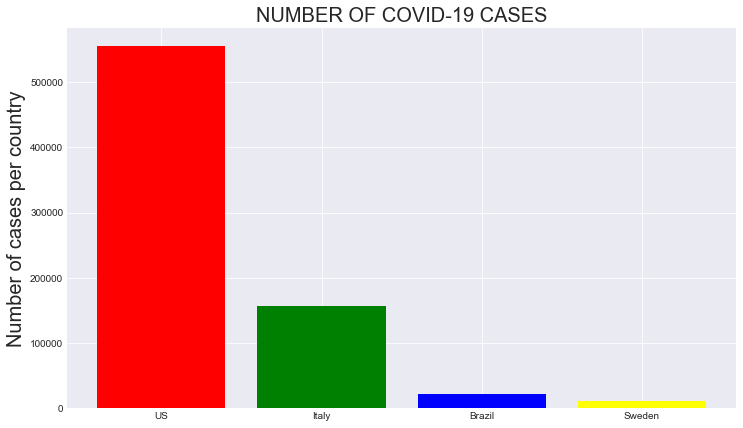

In [25]:
fig = plt.figure(figsize=(12, 7))
paises = ['US', 'Italy', 'Brazil', 'Sweden']
numeros = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

plt.ylabel('Number of cases per country', size = 20)
plt.title('NUMBER OF COVID-19 CASES', size=20)
plt.show()

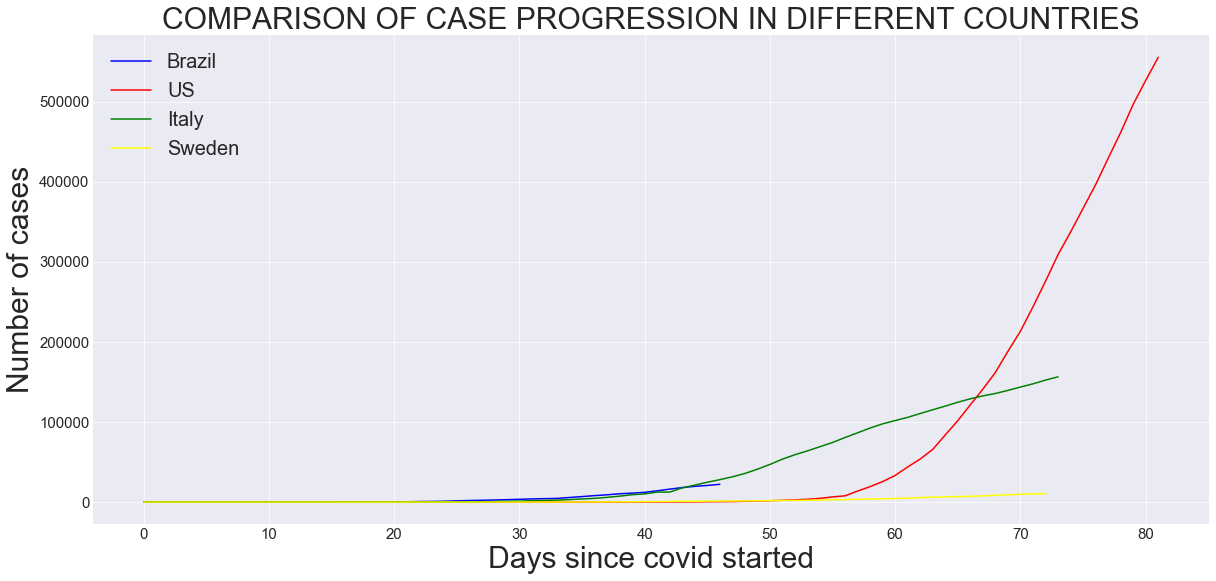

In [26]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')

plt.title('COMPARISON OF CASE PROGRESSION IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Sweden looks almost like a straight line when comparing with USA and Italy, Brazil is also very discreet next to Italy and USA, ahead we will compare these countries 2 to 2

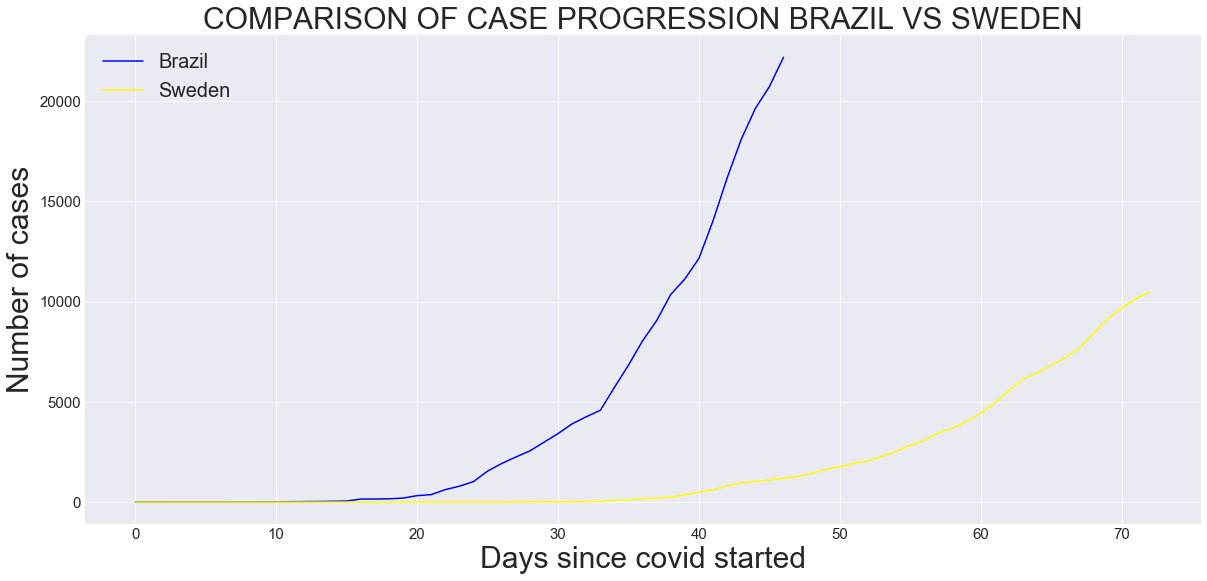

In [27]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARISON OF CASE PROGRESSION BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


como reparamos o covid demorou mais para começar a crescer na suecia do que no brasil

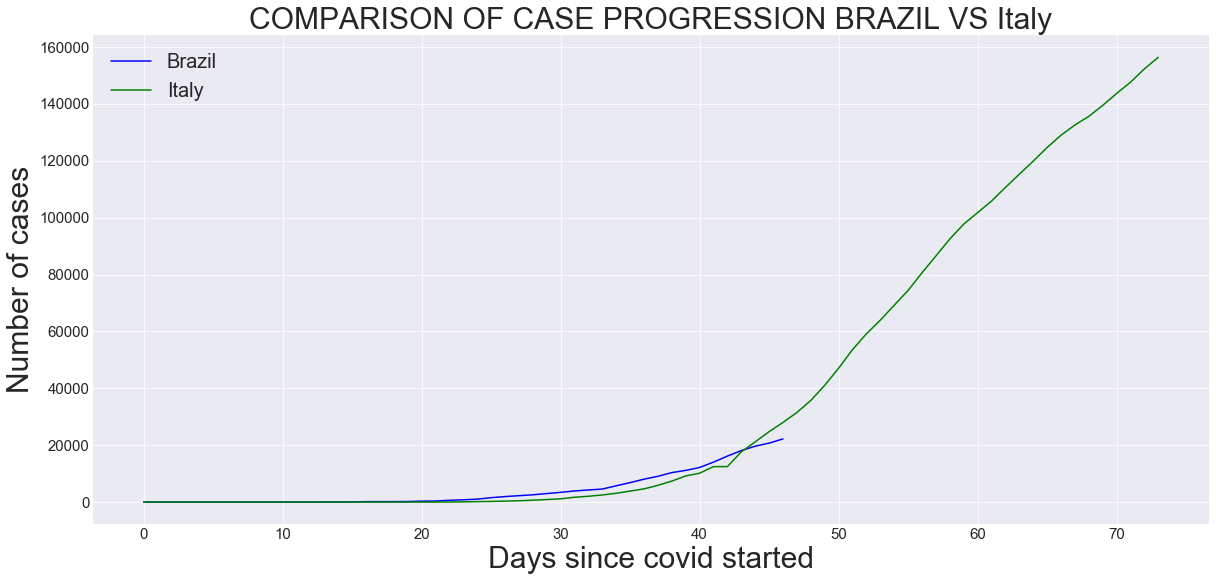

In [28]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_italia, casos_italia, color='green')

plt.title('COMPARISON OF CASE PROGRESSION BRAZIL VS Italy', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'Italy'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Nao podemos esquecer que o brasil tem populacao maior que a da italia, para numeros reais precisariamos do percentual, que sera realizado mais para frente.

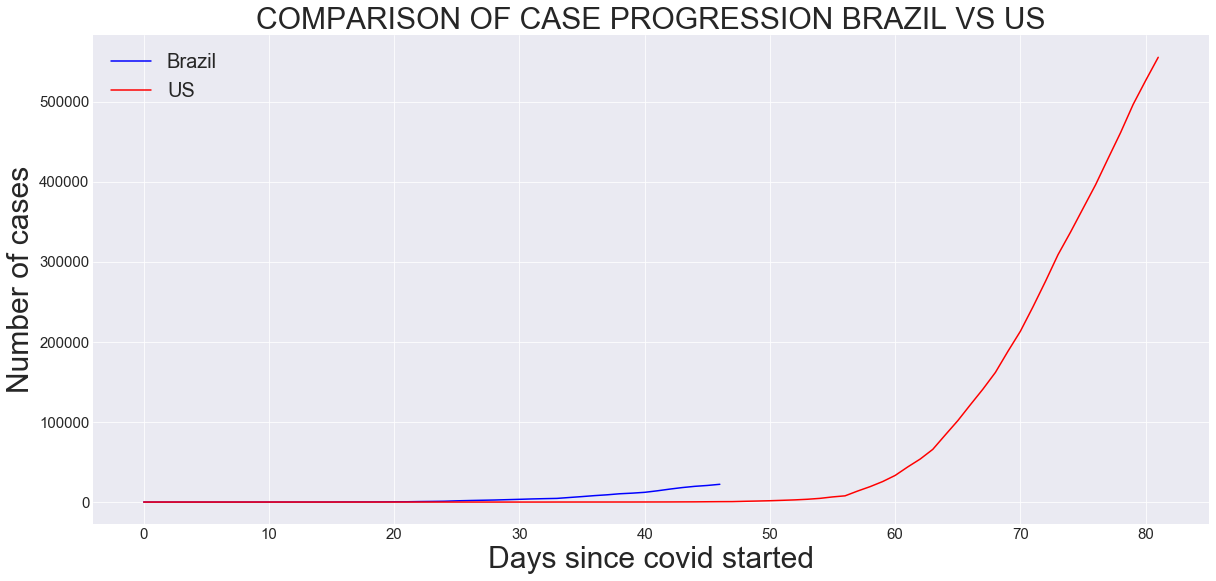

In [29]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')

plt.title('COMPARISON OF CASE PROGRESSION BRAZIL VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'US'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


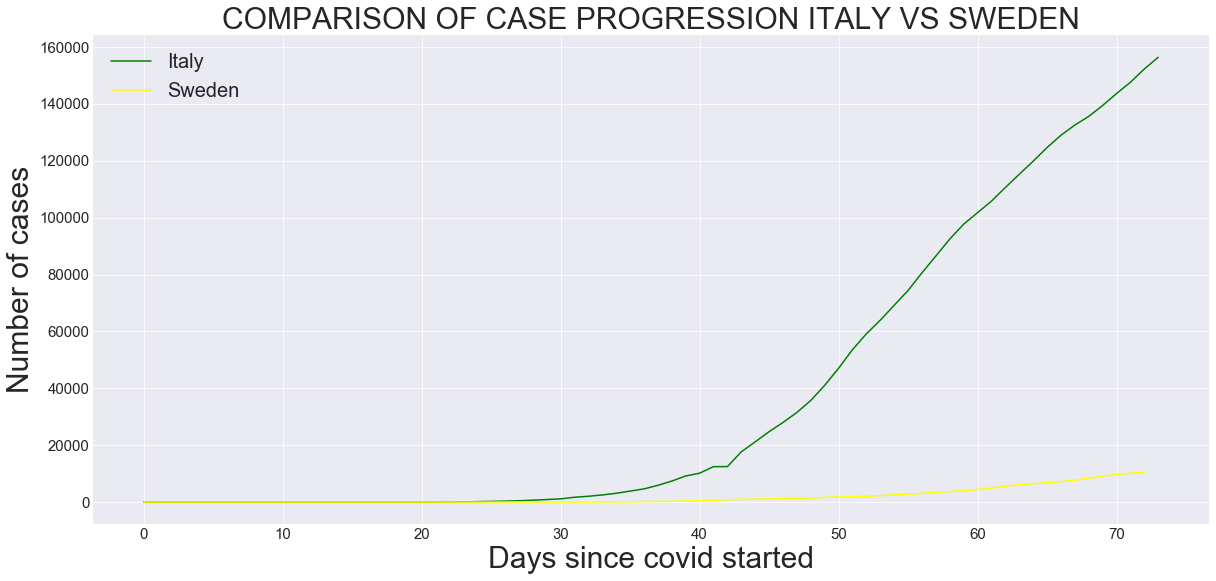

In [30]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARISON OF CASE PROGRESSION ITALY VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


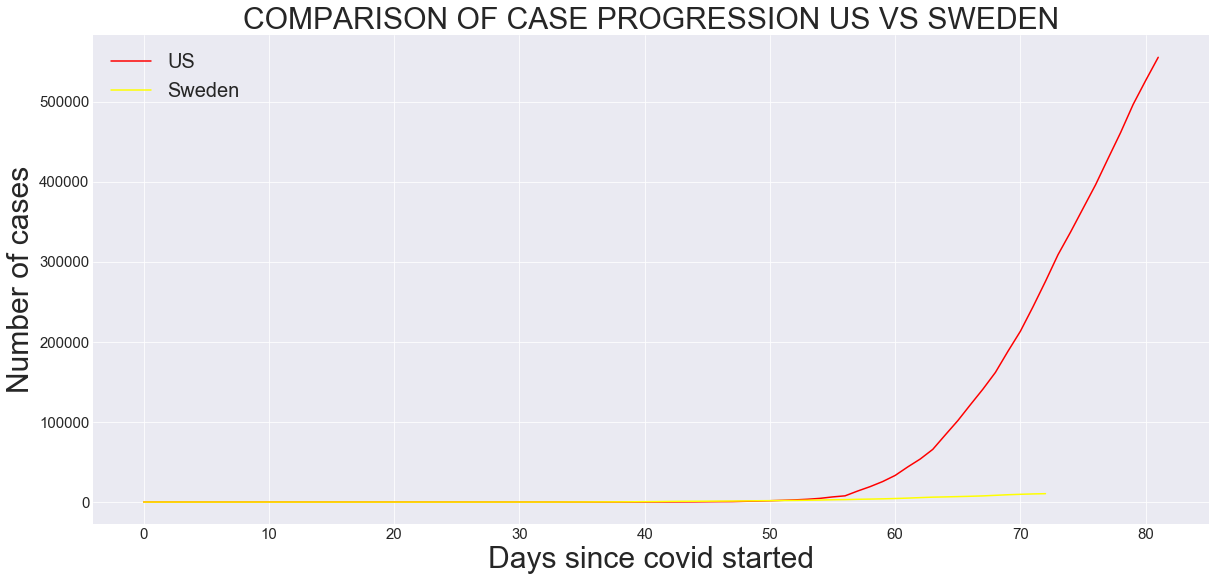

In [31]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARISON OF CASE PROGRESSION US VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['US', 'Sweden'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


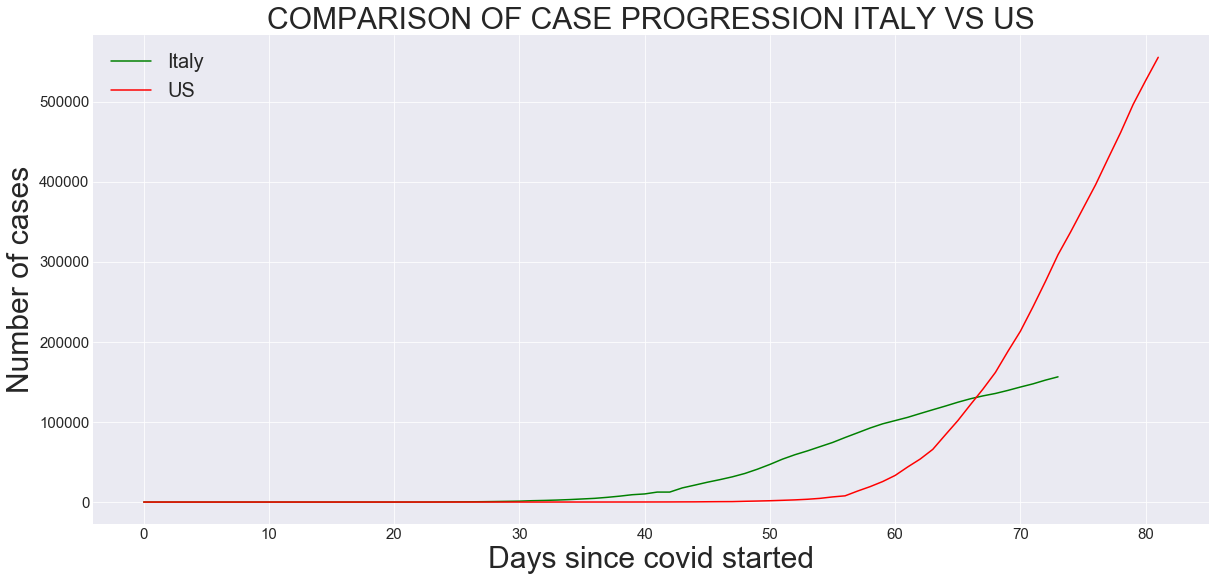

In [32]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_eua, casos_eua, color='red')


plt.title('COMPARISON OF CASE PROGRESSION ITALY VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Italy', 'US'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


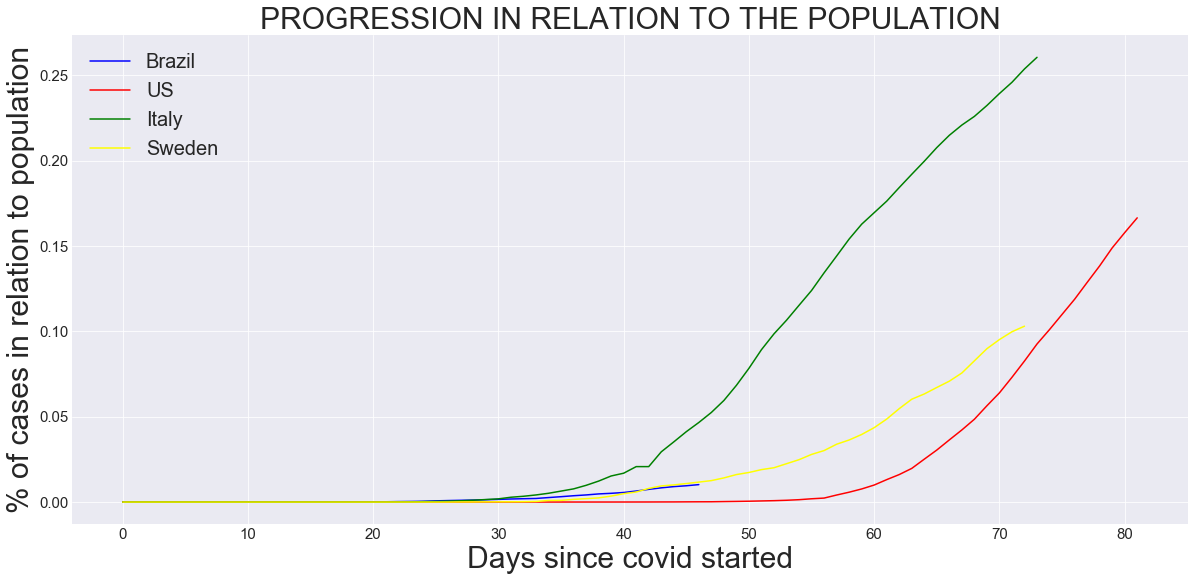

In [33]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in casos_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in casos_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in casos_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in casos_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSION IN RELATION TO THE POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of cases in relation to population', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()



** WHAT CAN BE REPAIRED THROUGH THESE CASE GRAPHICS: **
* Italy is moving towards stabilization


* Sweden as well as Brazil is on its rise, although Sweden took longer, it is very similar to Brazil
* **When we use a percentage of population, Brazil has the least number of cases** and it is growing at the same rate as in Sweden, so it is expected that by the 70th day Brazil will have  172 thousand cases
* Brazil as well as Sweden, tend to have more percentage cases than the United States
* Italy grew by a very large percentage






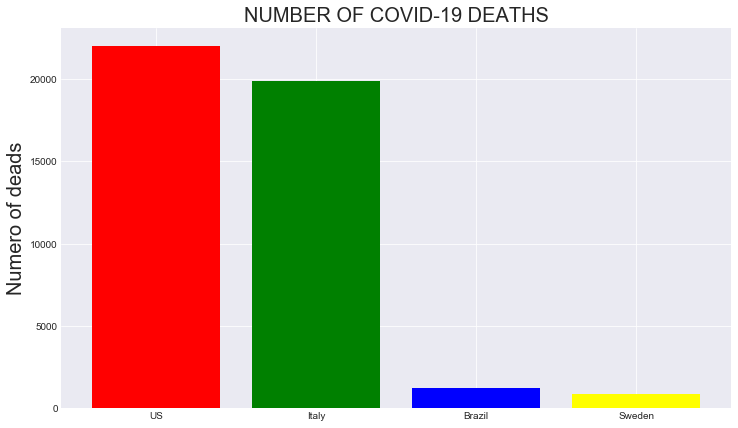

In [34]:
fig = plt.figure(figsize=(12, 7))
paises = ['US', 'Italy', 'Brazil', 'Sweden']
numeros = [mortos_eua,mortos_italia,mortos_brasil, mortos_suecia]
plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

plt.ylabel('Numero of deads', size = 20)
plt.title('NUMBER OF COVID-19 DEATHS', size=20)
plt.show()

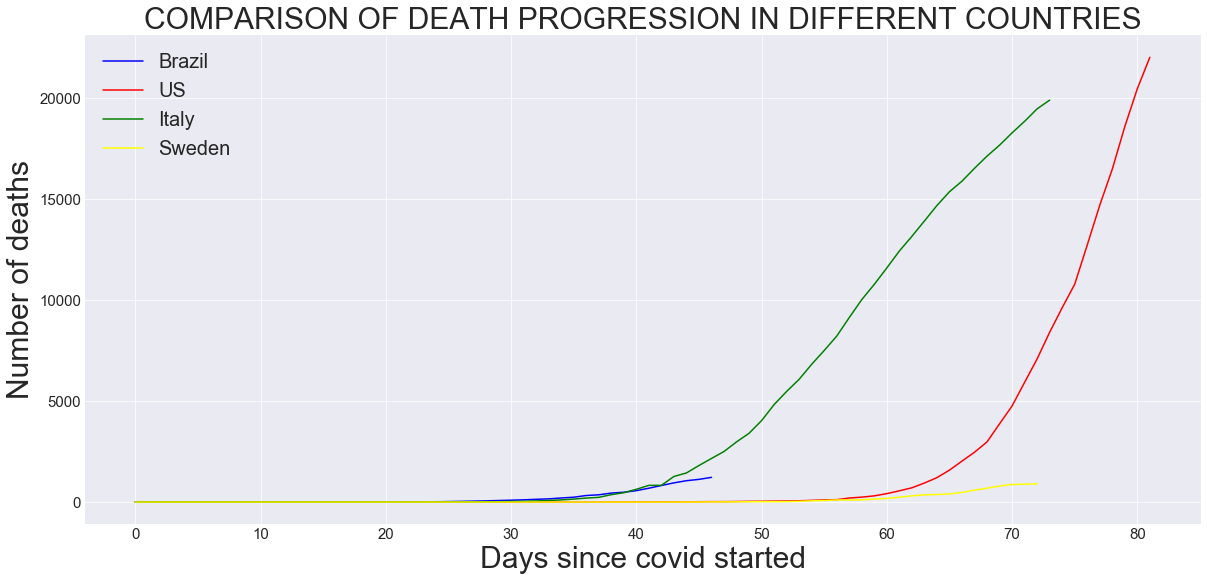

In [35]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_eua, mortes_eua, color='red')
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='yellow')

plt.title('COMPARISON OF DEATH PROGRESSION IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['Brazil', 'US', 'Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


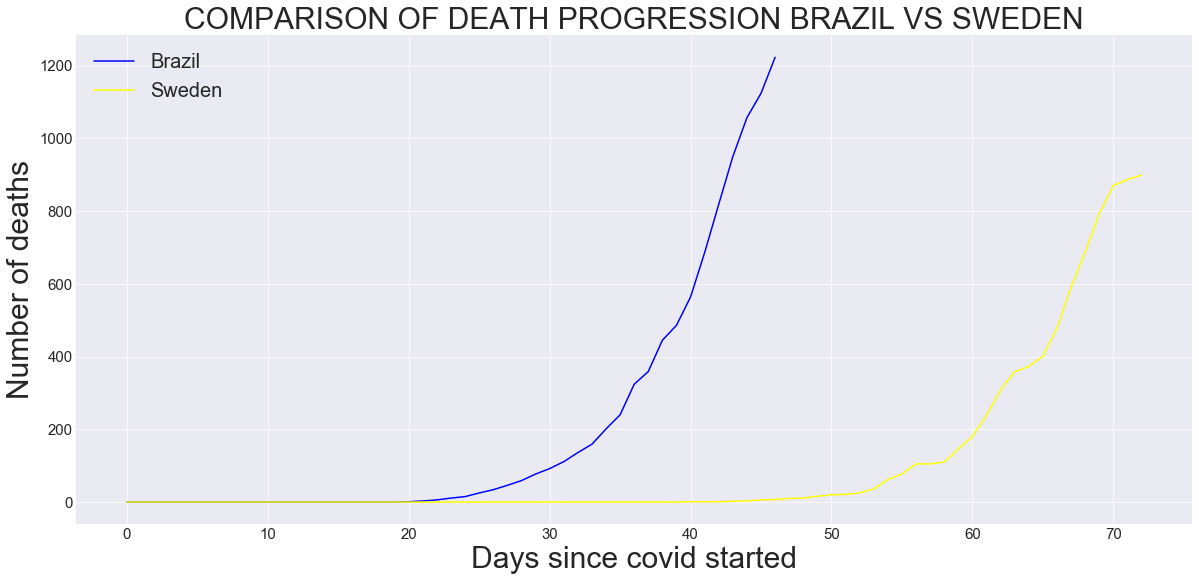

In [36]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_suecia, mortes_suecia, color='yellow')


plt.title('COMPARISON OF DEATH PROGRESSION BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


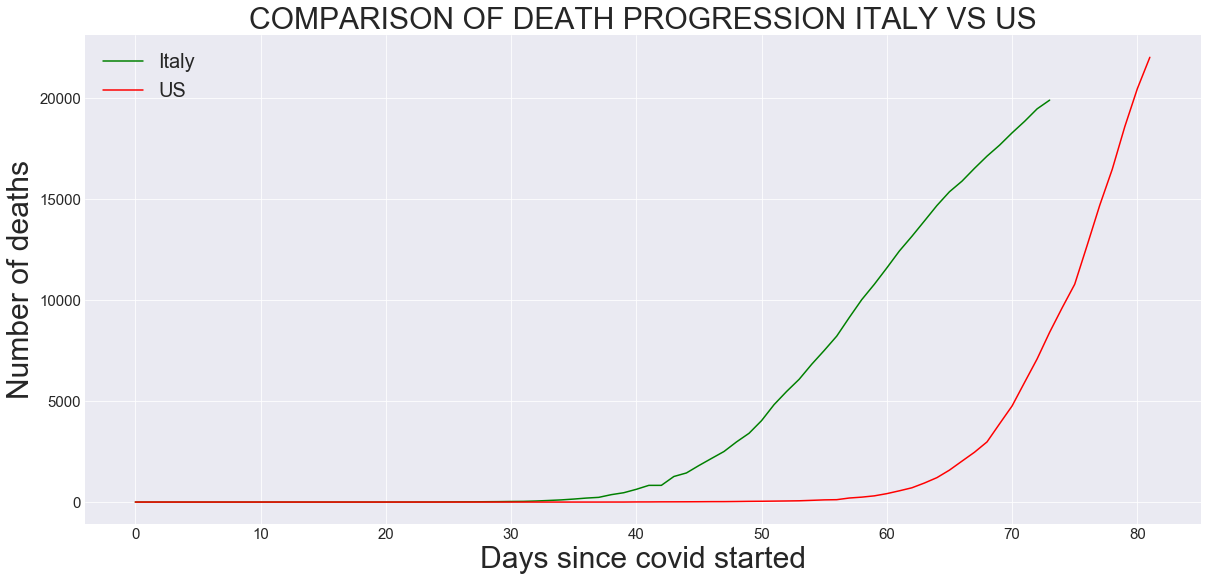

In [37]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_eua, mortes_eua, color='red')

plt.title('COMPARISON OF DEATH PROGRESSION ITALY VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['Italy', 'US'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


vemos que a italia esta diminuindo os casos de morte, sua curva esta sendo "achatada", enquanto os eua estao so aumentando

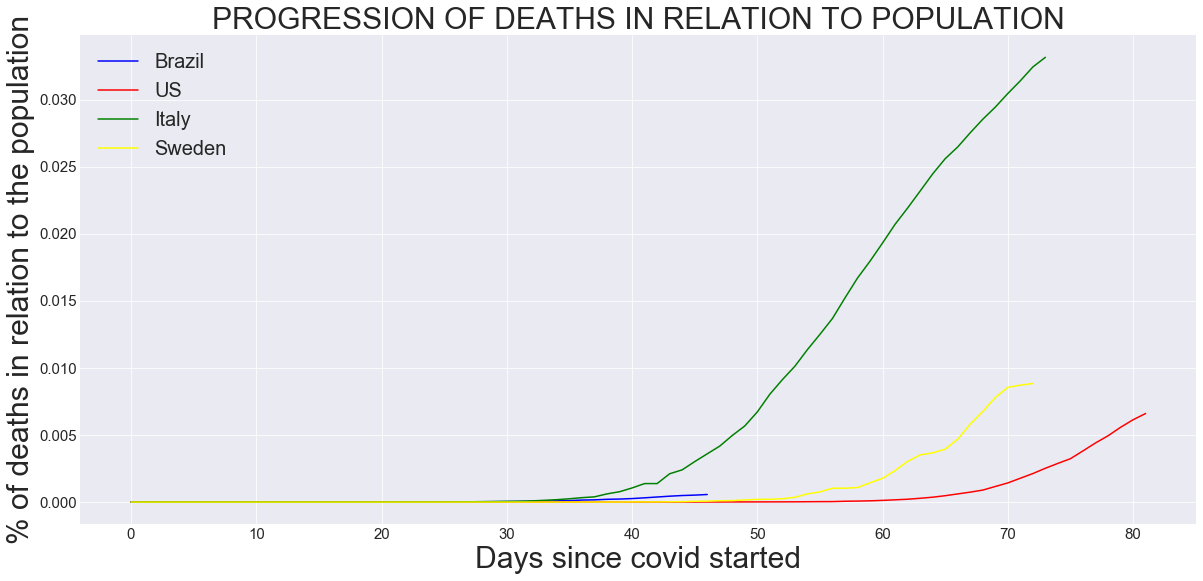

In [38]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in mortes_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSION OF DEATHS IN RELATION TO POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of deaths in relation to the population', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


When we see deaths in relation to% of population, we notice some things


* Italy is still fired up front with more numbers of deaths
* Sweden comes in front of Brazil and the USA
* Brazil is growing faster than the USA and Sweden
* Sweden and USA are on their growth curve

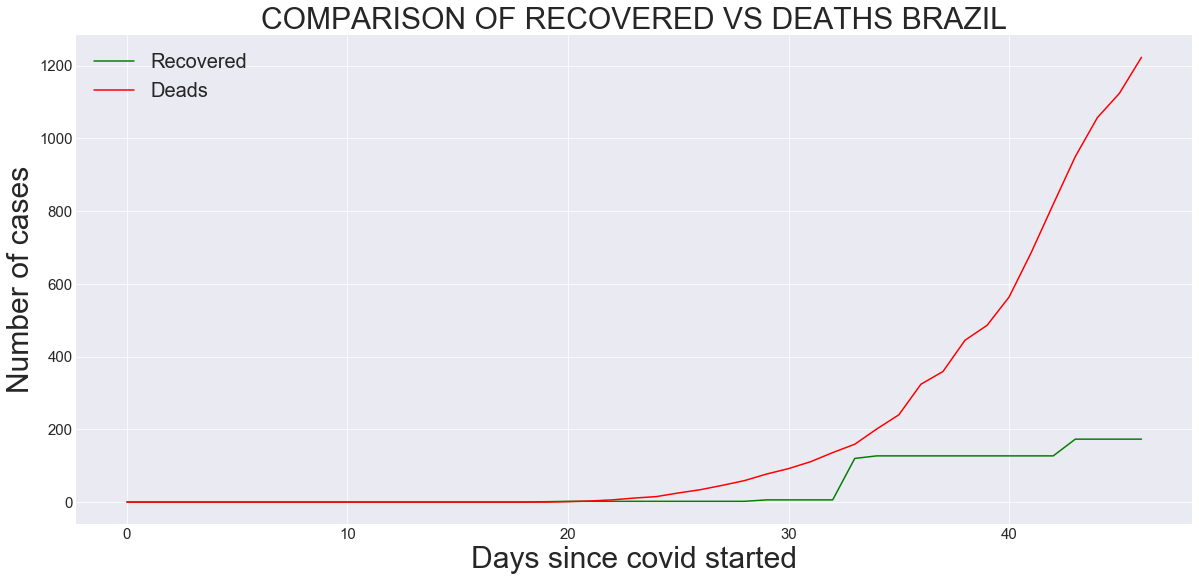

In [39]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, recuperados_brasil, color='green')
plt.plot(dias_brasil, mortes_brasil, color='red')


plt.title('COMPARISON OF RECOVERED VS DEATHS BRAZIL', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


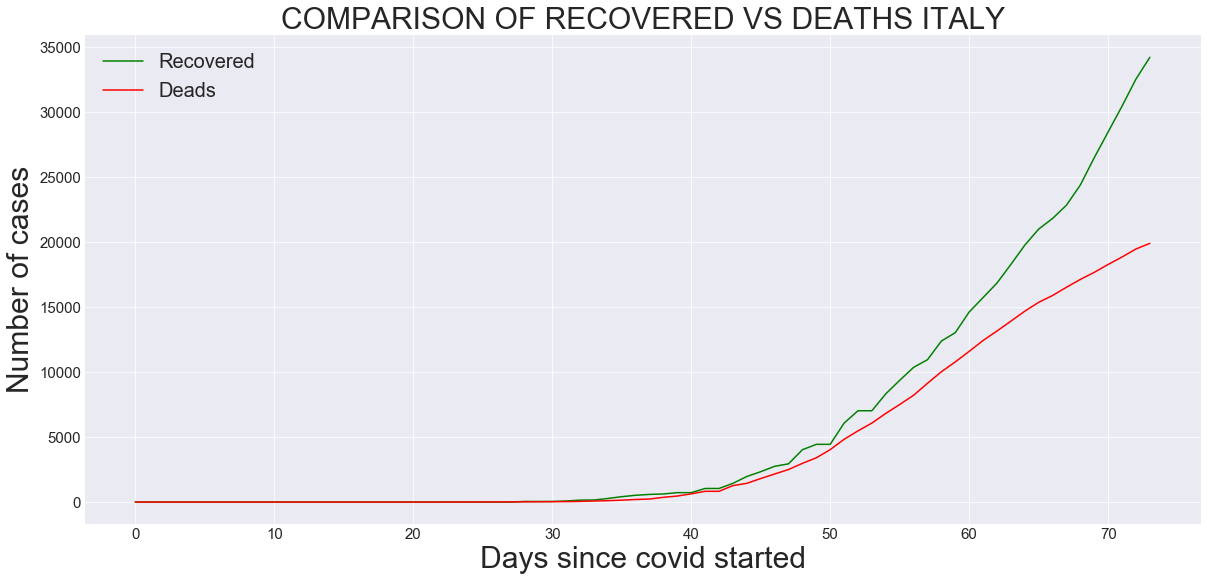

In [40]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, recuperados_italia, color='green')
plt.plot(dias_italia, mortes_italia, color='red')


plt.title('COMPARISON OF RECOVERED VS DEATHS ITALY', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


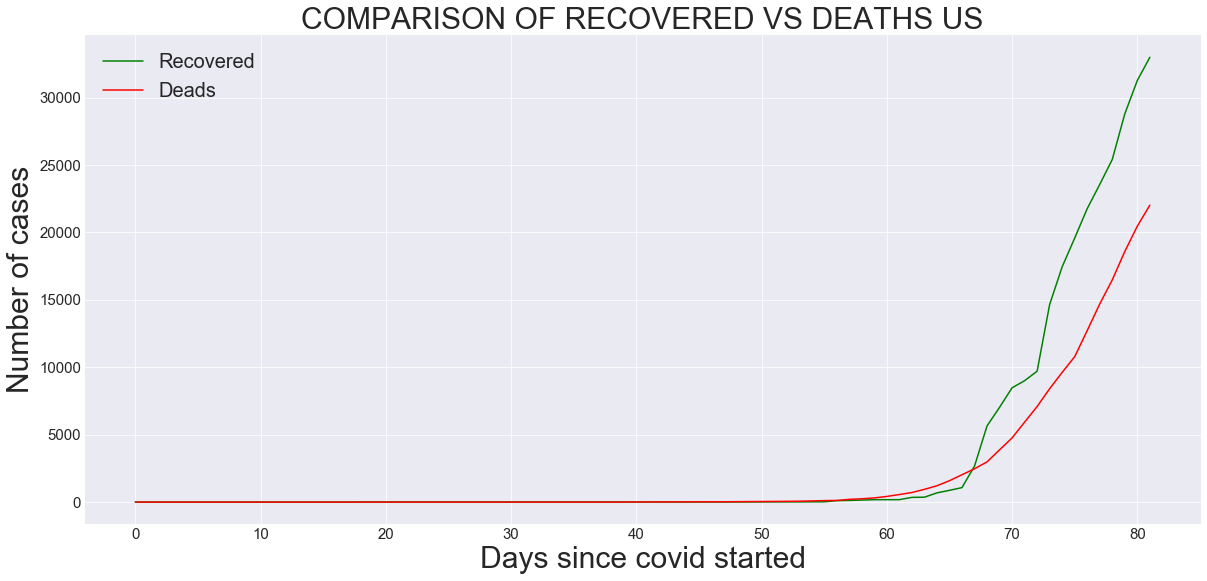

In [41]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, recuperados_eua, color='green')
plt.plot(dias_eua, mortes_eua, color='red')



plt.title('COMPARISON OF RECOVERED VS DEATHS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


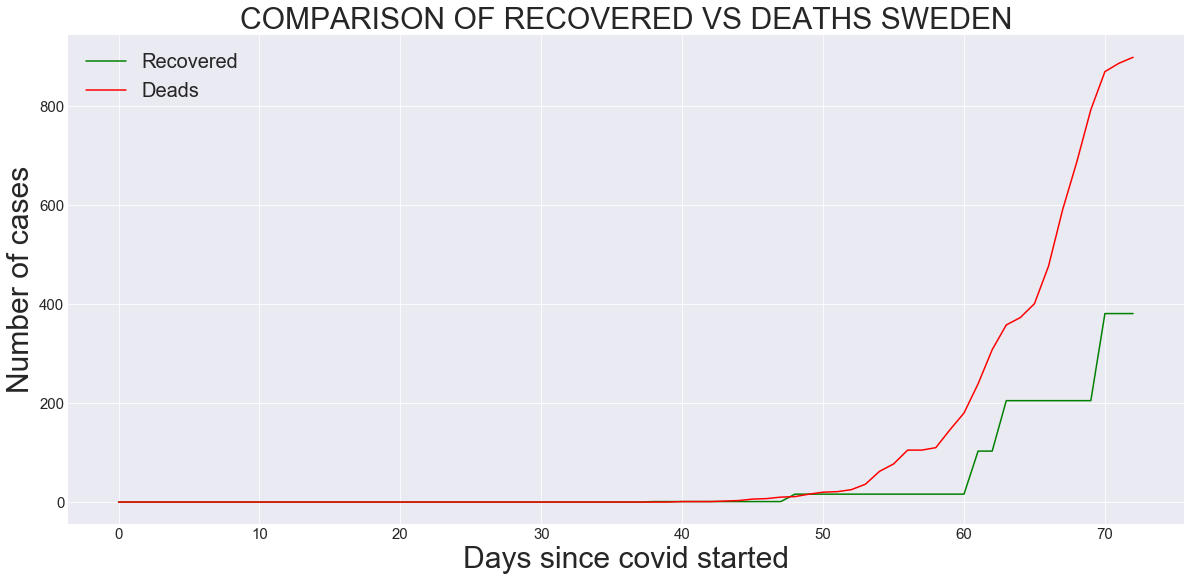

In [42]:
plt.figure(figsize=(20, 9))
plt.plot(dias_suecia, recuperados_suecia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='red')



plt.title('COMPARISON OF RECOVERED VS DEATHS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


As we can see, in the countries that have already had their growth curve more accentuated, the number of cured people exceeds the number of deaths, while in countries like Brazil and Sweden that have not yet reached this growth curve, the number of deaths is greater than the of recovered, including the number of recovered stabilizes.


# Predict

In this section we will apply sklearn's SVR algorithm to try to predict the number of deaths, cases and recoveries from the 4 countries in the next 40 days.


---

NOTE: ALL 2 PREDICTS FOR OTHER COUNTRIES ARE ALSO BEING OPTIMIZED IN ANOTHER FILE TO REDUCE THE ERROR, THIS MAY TAKE A FEW DAYS, IF YOU WANT THE MOST OPTIMIZED FOR OTHER COUNTRIES RETURN ANOTHER DAY

In [0]:
#separating the target (value to be forecasted) from the dates
target_confirmado_br = df_confirmados_brasil['cases'].copy()
df_confirmados_brasil.drop('cases', axis = 1, inplace= True)

target_mortos_br = df_mortes_brasil['deaths'].copy()
df_mortes_brasil.drop('deaths', axis = 1, inplace= True)

target_recuperado_br = df_recuperados_brasil['recovery']
df_recuperados_brasil.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_eua = df_confirmados_eua['cases'].copy()
df_confirmados_eua.drop('cases', axis = 1, inplace= True)

target_mortos_eua = df_mortes_eua['deaths'].copy()
df_mortes_eua.drop('deaths', axis = 1, inplace= True)

target_recuperado_eua = df_recuperados_eua['recovery']
df_recuperados_eua.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_italia = df_confirmados_italia['cases'].copy()
df_confirmados_italia.drop('cases', axis = 1, inplace= True)

target_mortos_italia = df_mortes_italia['deaths'].copy()
df_mortes_italia.drop('deaths', axis = 1, inplace= True)

target_recuperado_italia = df_recuperados_italia['recovery']
df_recuperados_italia.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_suecia = df_confirmados_suecia['cases'].copy()
df_confirmados_suecia.drop('cases', axis = 1, inplace= True)

target_mortos_suecia = df_mortes_suecia['deaths'].copy()
df_mortes_suecia.drop('deaths', axis = 1, inplace= True)

target_recuperado_suecia = df_recuperados_suecia['recovery']
df_recuperados_suecia.drop('recovery', axis = 1, inplace= True)

In [0]:
# Start from Brazil

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_brasil, target_confirmado_br, test_size=0.1, random_state=42)

In [46]:
params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# gridsearch is implementing raw in another file on the local machine, as it took more than 24 hours to run
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_br = svm.predict(futuro_brasil)

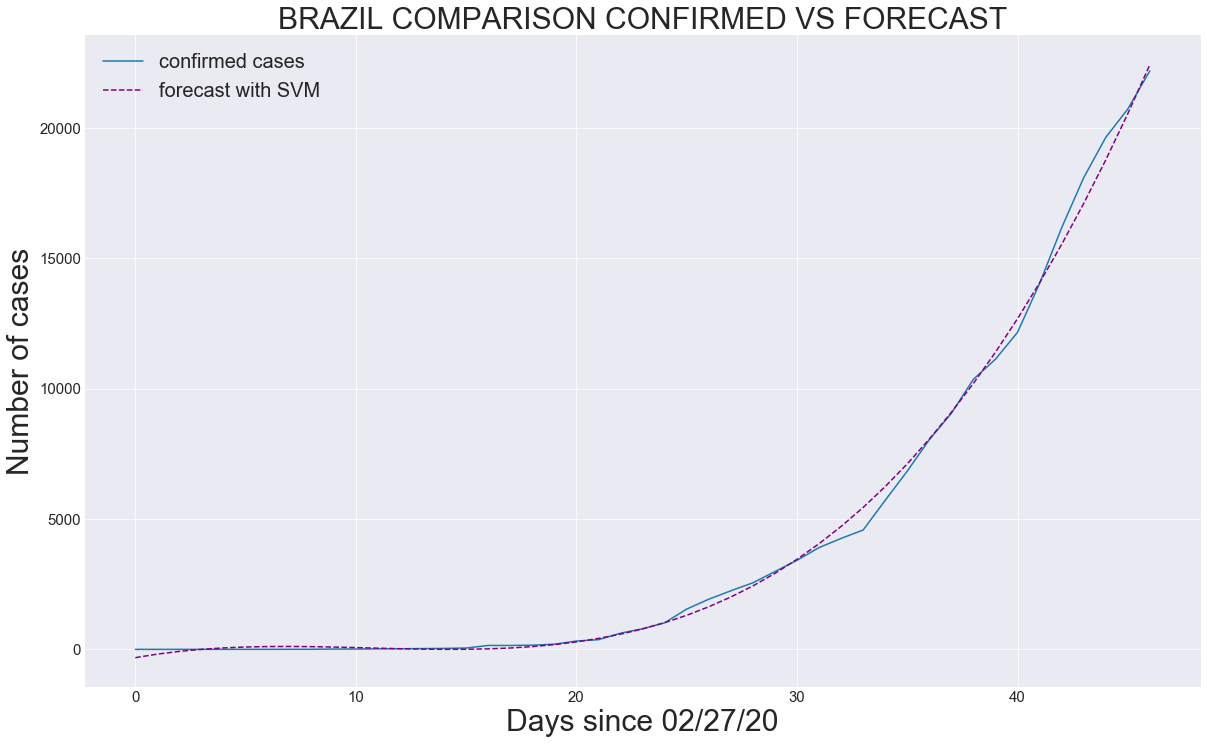

In [48]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, casos_brasil)
plt.plot(futuro_brasil[0:47],pred_caso_br[0:47], linestyle = 'dashed', color='purple')
plt.title('BRAZIL COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since 02/27/20', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_mortes_brasil, target_mortos_br, test_size=0.1, random_state=42)

params = {'C': [2],
 'coef0': [4.0],
 'epsilon': [0.01],
 'gamma': [0.1],
 'kernel': ['poly'],
 'max_iter': [-1],
 'shrinking': [True],
  'degree':[4] }
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  9.1min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [4.0], 'degree': [4],
                         'epsilon': [0.01], 'gamma': [0.1], 'kernel': ['poly'],
                         'max_iter': [-1], 'shrinking': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_br = svm.predict(futuro_brasil)

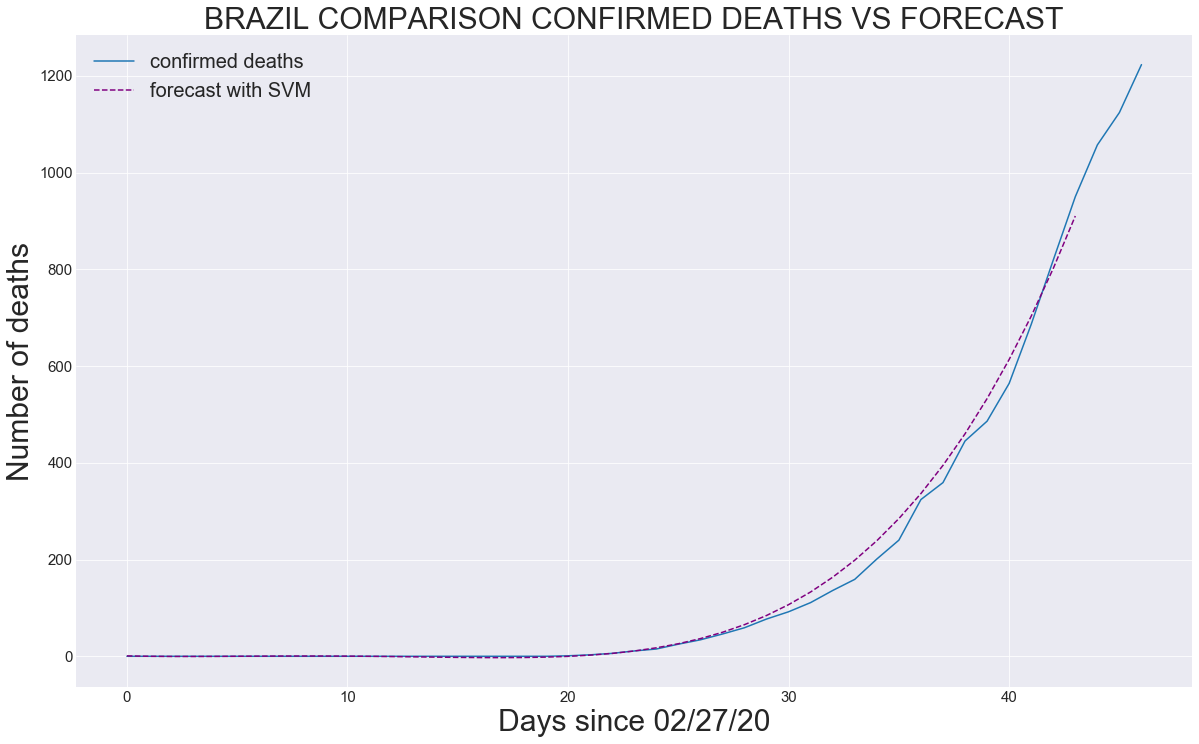

In [51]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, mortes_brasil)
plt.plot(futuro_brasil[0:44], pred_mortes_br[0:44], linestyle = 'dashed', color='purple')
plt.title('BRAZIL COMPARISON CONFIRMED DEATHS VS FORECAST', size=30)
plt.xlabel('Days since 02/27/20', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [52]:
#US
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_eua, target_confirmado_eua, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_eua = svm.predict(futuro_eua)

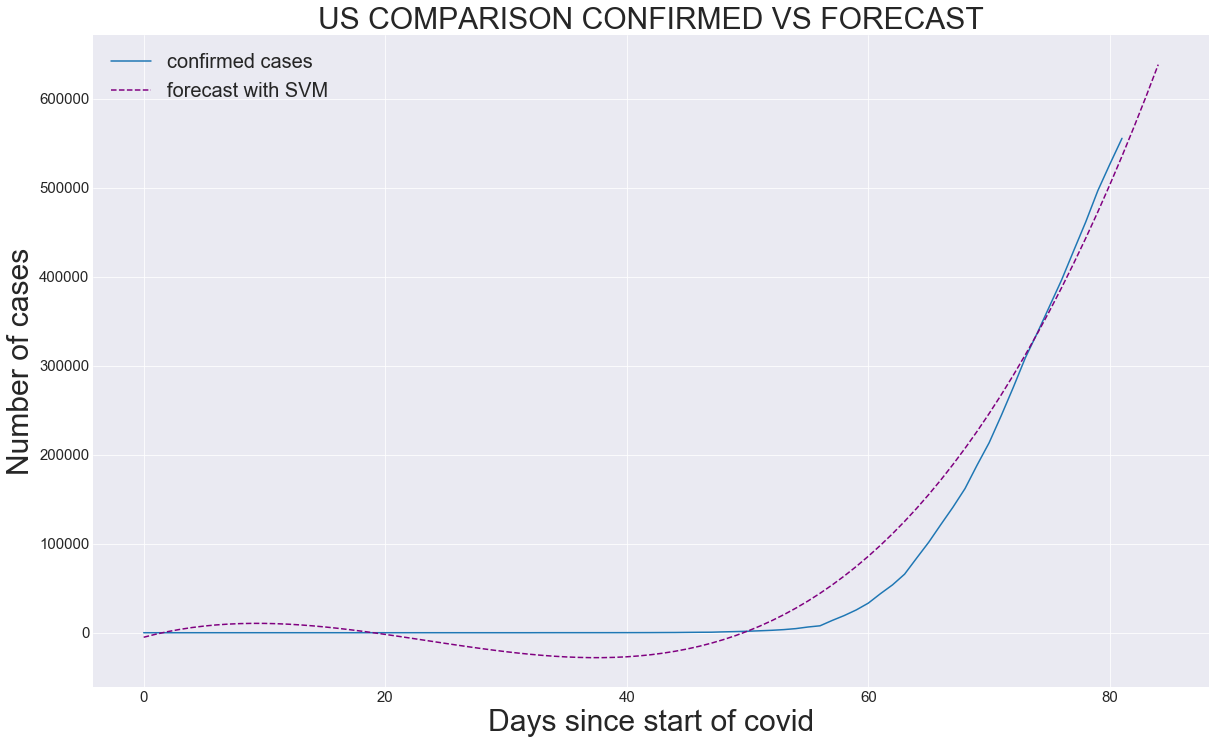

In [54]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, casos_eua)
plt.plot(futuro_eua[0:85],pred_caso_eua[0:85], linestyle = 'dashed', color='purple')
plt.title('US COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_mortes_eua, target_mortos_eua, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 64.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_eua = svm.predict(futuro_eua)

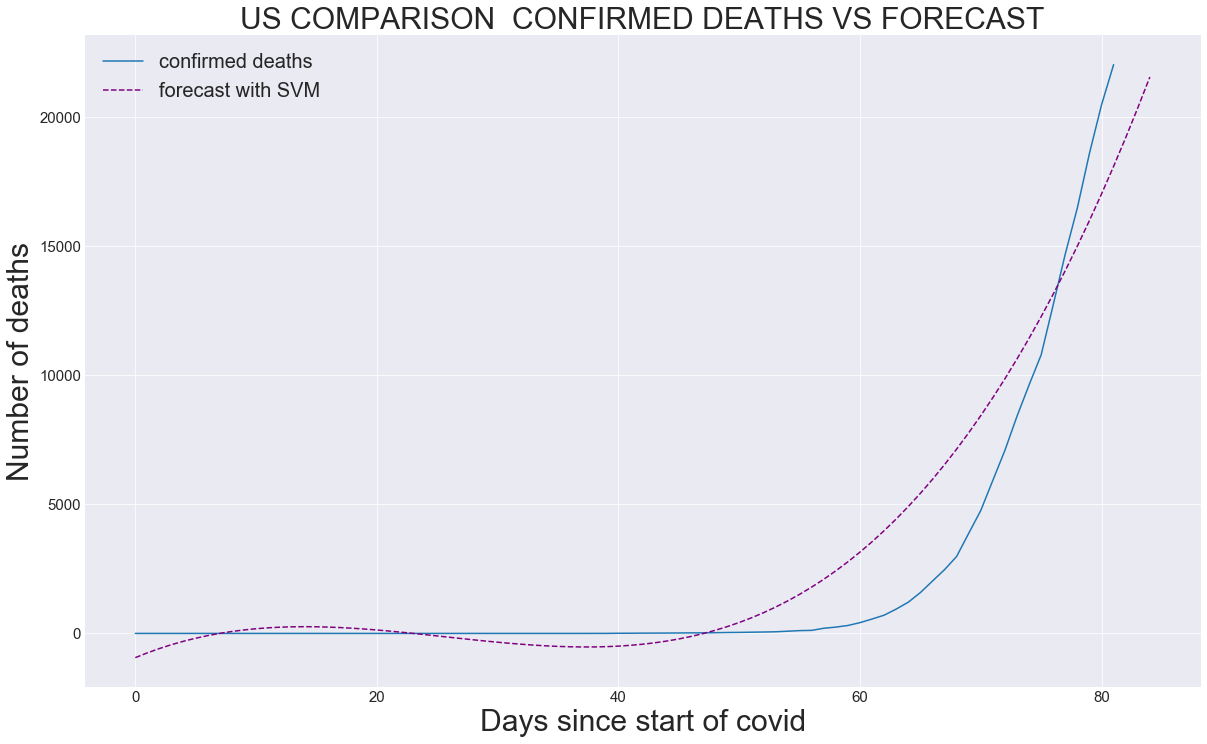

In [57]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, mortes_eua)
plt.plot(futuro_eua[0:85],pred_mortes_eua[0:85], linestyle = 'dashed', color='purple')
plt.title('US COMPARISON  CONFIRMED DEATHS VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [58]:
# Italy Predict
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_italia, target_confirmado_italia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_italia = svm.predict(futuro_italia)

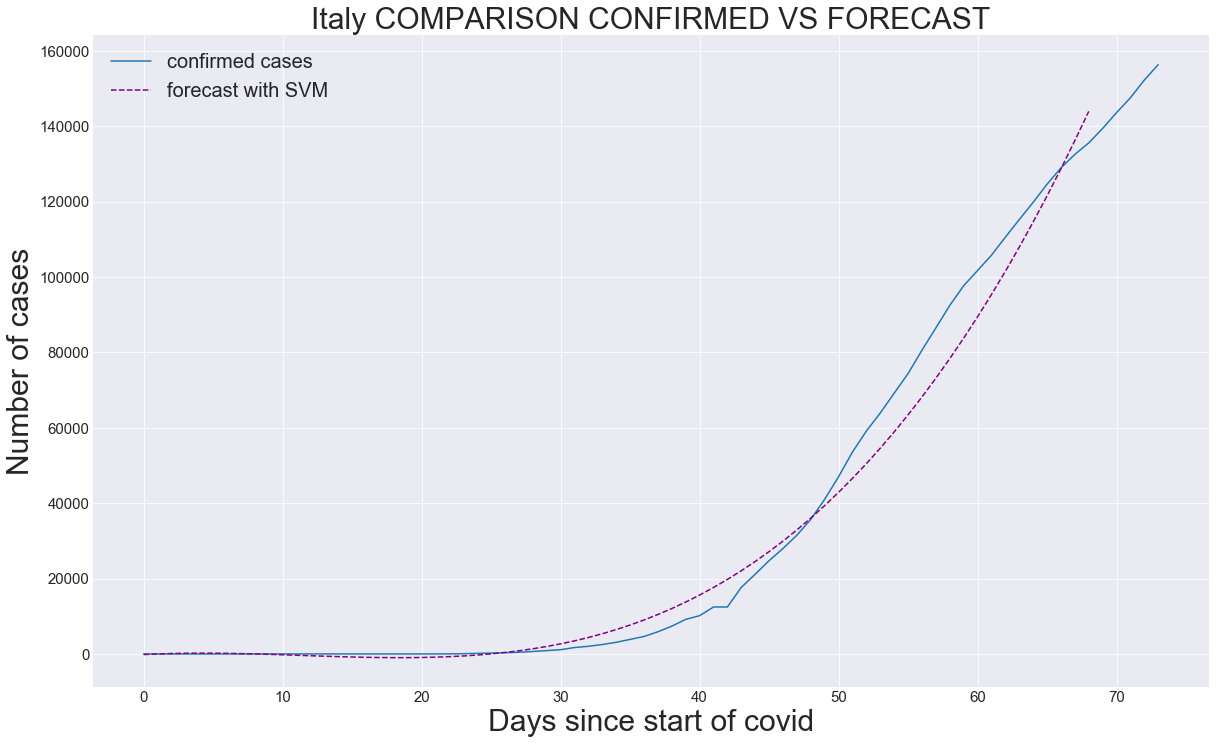

In [60]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, casos_italia)
plt.plot(futuro_italia[0:69],pred_caso_italia[0:69], linestyle = 'dashed', color='purple')
plt.title('Italy COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_mortes_italia, target_mortos_italia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 31.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_italia = svm.predict(futuro_italia)

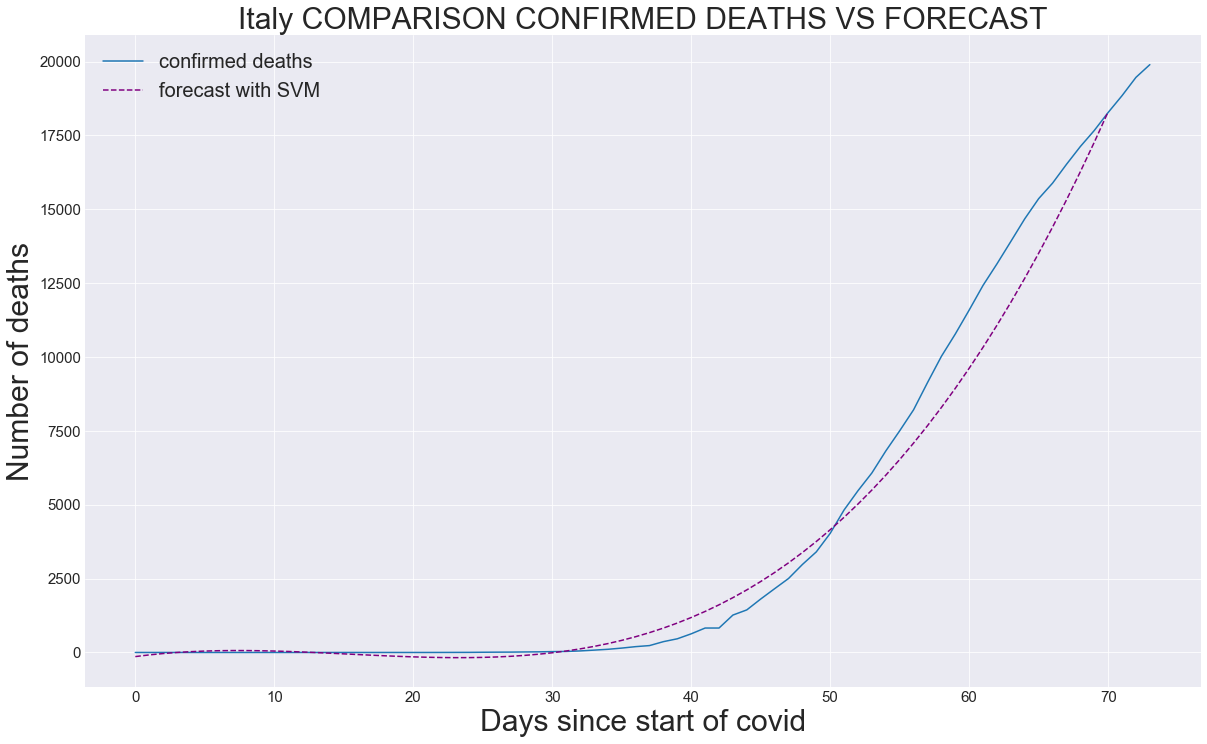

In [63]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, mortes_italia)
plt.plot(futuro_italia[0:71],pred_mortes_italia[0:71], linestyle = 'dashed', color='purple')
plt.title('Italy COMPARISON CONFIRMED DEATHS VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [64]:
# Sweden predict
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_suecia, target_confirmado_suecia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 24.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_suecia = svm.predict(futuro_suecia)

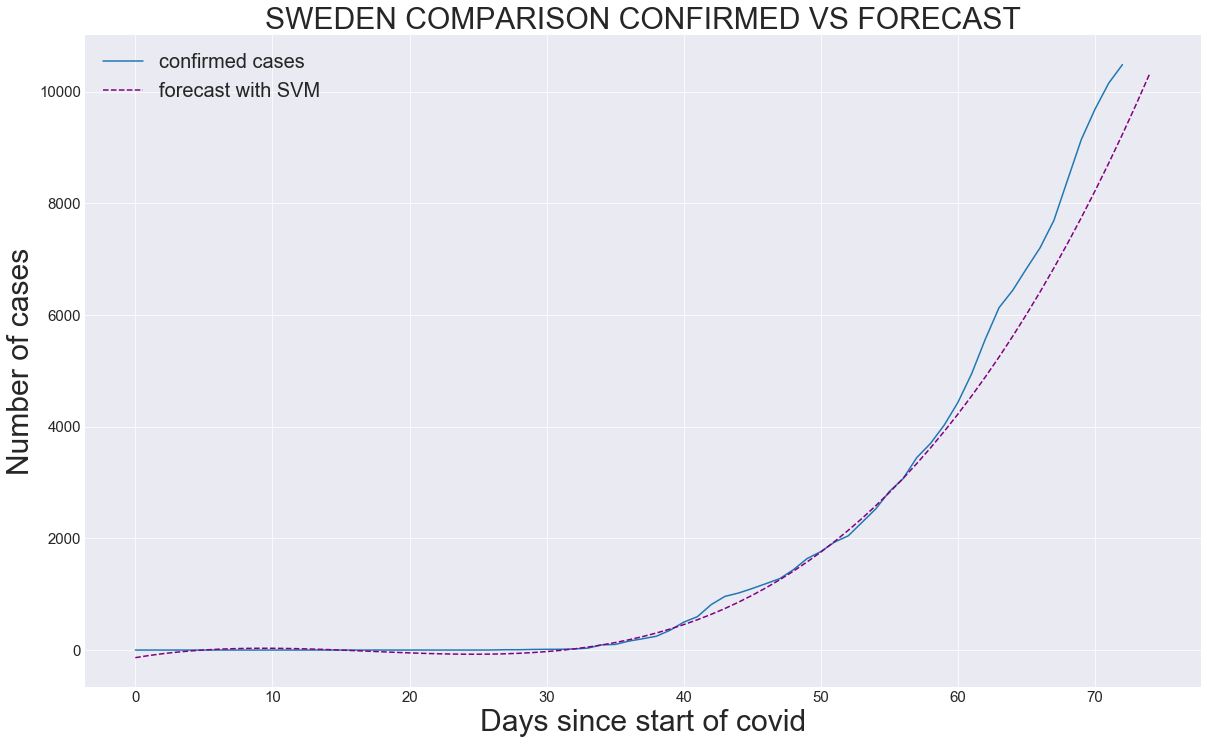

In [66]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, casos_suecia)
plt.plot(futuro_suecia[0:75],pred_caso_suecia[0:75], linestyle = 'dashed', color='purple')
plt.title('SWEDEN COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [67]:
X_train, X_test, y_train, y_test = train_test_split(df_mortes_suecia, target_mortos_suecia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 44.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_suecia = svm.predict(futuro_suecia)

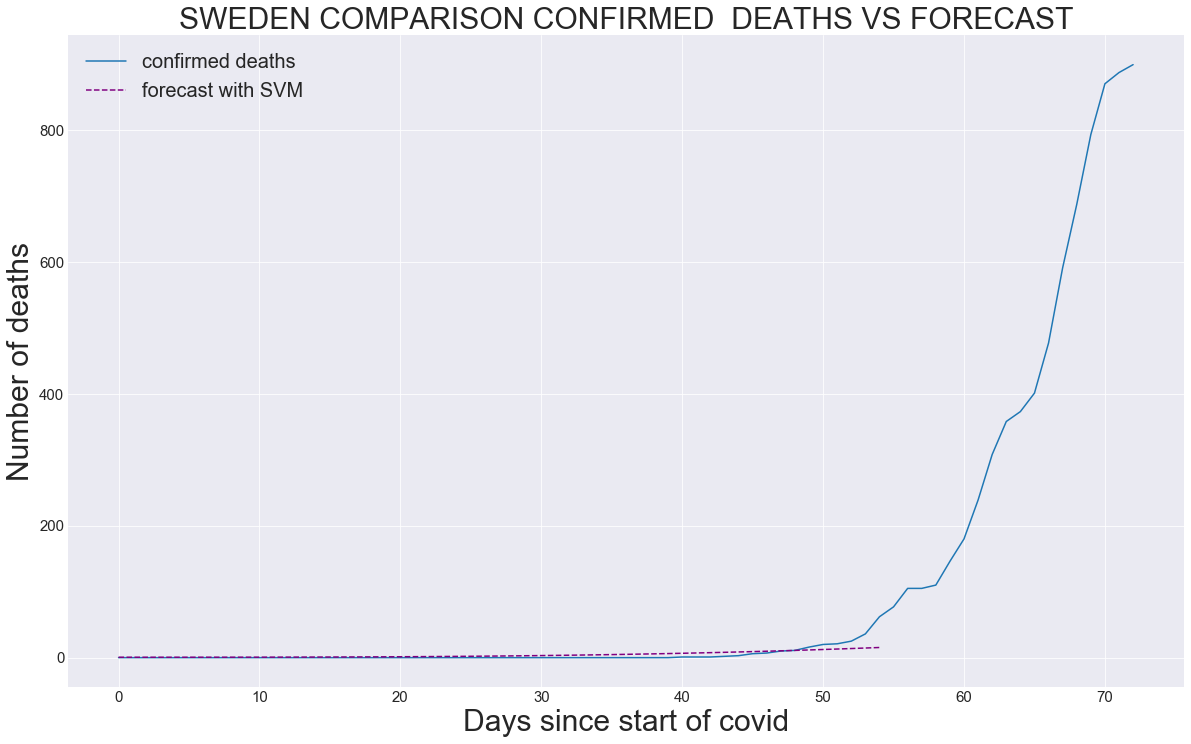

In [69]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, mortes_suecia)
plt.plot(futuro_suecia[0:55],pred_mortes_suecia[0:55], linestyle = 'dashed', color='purple')
plt.title('SWEDEN COMPARISON CONFIRMED  DEATHS VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# Results Presentation

In this section we will build 8 data frames, one of confirmed cases and one of deaths for each country. In these dataframes we will have the official cases and those that our program predicted, and it will be updated directly.
In addition to these dataframes, we will redo the graphics made in the graphics section, but now with the forecasts, to see if the scenario of the countries change in relation to each other

In [0]:
colunas =[i for i in datas_futuras_br]
previsto = [i for i in pred_caso_br]
index = ['Predict', 'Real', 'Difference']
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_br, casos_brasil)]
df_caso_br = pd.DataFrame([previsto[40:], casos_brasil[40:], diferenca[40:]], columns=colunas[40:], index = index)


Below is the average error of our forecast for the confirmed cases in Brazil and the table with the forecasts, real cases and the difference between the two.
since these are forecasts, there are tables that have no differences yet, as our program has 40 days ahead. DRAG THE TABLES SCROLL BAR TO SEE FUTURE DAYS.
order of tables:


1. Brazil confirmed
2. Dead Brazil
3. Confirmed USA
4. Dead USA
5. Italy confirmed
6. Dead Italy
7. Sweden confirmed
8. Dead Sweden

In [71]:
diferenca = np.array(diferenca[40:])
print(f'THE  AVERAGE ERROR  FOR CONFIRMED CASES IN BRAZIL WAS : {np.absolute(diferenca).mean()}')

THE  AVERAGE ERROR  FOR CONFIRMED CASES IN BRAZIL WAS : 494.42857142857144


In [72]:
print('CONFIRMED CASES FOR BRAZIL: ')
pd.set_option('display.max_columns', 250)
df_caso_br

CONFIRMED CASES FOR BRAZIL: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
Predict,12684.034454,14060.598873,15532.080438,17101.595017,18772.258477,20547.186684,22429.495504,24422.300804,26528.718451,28751.864309,31094.854248,33560.804133,36152.829832,38874.047209,41727.572129,44716.520465,47844.008079,51113.150837,54527.064608,58088.865257,61801.66865,65668.590656,69692.747139,73877.253965,78225.227005,82739.782122,87424.035181,92281.102049,97314.098598,102526.14069,107920.344191,113499.82497,119267.698893,125227.081821,131381.089628,137732.838181,144285.443344,151042.020973,158005.686955,165179.557137,172566.747406,180170.373608,187993.55162,196039.397308,204311.026543,212811.55518,221544.099091
Real,12161.000000,14034.000000,16170.000000,18092.000000,19638.000000,20727.000000,22192.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difference,523.000000,26.000000,-638.000000,-991.000000,-866.000000,-180.000000,237.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_br]
previsto = [i for i in pred_mortes_br]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_br, mortes_brasil)]
df_morto_br = pd.DataFrame([previsto[40:], mortes_brasil[40:], diferenca[40:]], columns=colunas[40:], index = index )


In [74]:
diferenca = np.array(diferenca[40:])
print(f'THE  AVERAGE ERROR  FOR DEATHS CASES IN BRAZIL WAS : {np.absolute(diferenca).mean()}')

THE  AVERAGE ERROR  FOR DEATHS CASES IN BRAZIL WAS : 37.57142857142857


In [75]:
print('DEATHS IN BRASIL: ')
pd.set_option('display.max_columns', 250)
df_morto_br

DEATHS IN BRASIL: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
Predict,613.481267,702.945477,801.61431,910.086093,1028.977686,1158.924473,1300.580383,1454.617864,1621.727897,1802.620003,1998.022209,2208.681104,2435.361803,2678.847934,2939.941664,3219.46369,3518.253252,3837.168114,4177.084557,4538.897408,4923.520029,5331.884299,5764.940649,6223.658003,6709.023872,7222.044234,7763.743646,8335.165177,8937.370453,9571.439566,10238.471217,10939.582575,11675.90939,12448.605948,13258.844954,14107.817778,14996.734307,15926.822838,16899.330378,17915.522311,18976.682616,20084.11386,21239.136984,22443.091639,23697.335906,25003.246359,26362.21826
Real,564.000000,686.000000,819.00000,950.000000,1057.000000,1124.000000,1223.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difference,49.000000,16.000000,-18.00000,-40.000000,-29.000000,34.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_us]
previsto = [i for i in pred_caso_eua]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_eua, casos_eua)]
df_caso_eua = pd.DataFrame([previsto[75:], casos_eua[75:], diferenca[75:]], columns=colunas[75:], index = index)


In [77]:
diferenca = np.array(diferenca[75:])
print(f'THE AVERAGE ERROR  FOR CONFIRMED CASES IN US WAS : : {np.absolute(diferenca).mean()}')

THE AVERAGE ERROR  FOR CONFIRMED CASES IN US WAS : : 16190.57142857143


In [78]:
print('CONFIRMED CASES IN US: ')
df_caso_eua

CONFIRMED CASES IN US: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
Predict,361370.707735,387545.452944,414814.451265,443198.508821,472718.431719,503395.026079,535249.09804,568301.453722,602572.899233,638084.240709,674856.284273,712909.836046,752265.70215,792944.688692,834967.601839,878355.247652,923128.432314,969307.961916,1.016915e+06,1.065969e+06,1.116493e+06,1.168506e+06,1.222029e+06,1.277084e+06,1.333690e+06,1.391869e+06,1.451642e+06,1.513030e+06,1.576052e+06,1.640731e+06,1.707086e+06,1.775139e+06,1.844910e+06,1.916421e+06,1.989692e+06,2.064743e+06,2.141597e+06,2.220272e+06,2.300791e+06,2.383174e+06,2.467442e+06,2.553616e+06,2.641716e+06,2.731764e+06,2.823779e+06,2.917784e+06,3.013798e+06
Real,366667.000000,396223.000000,429052.000000,461437.000000,496535.000000,526396.000000,555313.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difference,-5297.000000,-8678.000000,-14238.000000,-18239.000000,-23817.000000,-23001.000000,-20064.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_us]
previsto = [i for i in pred_mortes_eua]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_eua, mortes_eua)]
df_morto_eua = pd.DataFrame([previsto[75:], mortes_eua[75:], diferenca[75:]], columns=colunas[75:], index = index)


In [80]:
diferenca = np.array(diferenca[75:])
print(f'THE AVERAGE ERROR  FOR CONFIRMED DEATHS IN US WAS : : {np.absolute(diferenca).mean()}')

THE AVERAGE ERROR  FOR CONFIRMED DEATHS IN US WAS : : 2001.5714285714287


In [81]:
print('DEATHS IN US ')
df_morto_eua

DEATHS IN US 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
Predict,12262.997235,13136.729461,14047.944526,14997.387503,15985.803401,17013.9372,18082.533912,19192.338546,20344.096114,21538.551626,22776.450093,24058.536586,25385.555993,26758.253449,28177.373841,29643.66227,31157.863718,32720.723226,34332.985743,35995.396309,37708.699968,39473.641637,41290.966419,43161.419231,45085.745239,47064.689361,49098.996576,51189.411866,53336.680393,55541.547015,57804.756715,60127.054773,62509.18593,64951.895345,67455.927818,70022.02851,72650.942586,75343.414659,78100.190137,80922.013816,83809.630861,86763.786065,89785.224597,92874.691432,96032.931432,99260.689882,102558.711755
Real,10783.000000,12722.000000,14695.000000,16478.000000,18586.000000,20463.0000,22020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difference,1479.000000,414.000000,-648.000000,-1481.000000,-2601.000000,-3450.0000,-3938.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_it]
previsto = [i for i in pred_caso_italia]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_italia, casos_italia)]
df_caso_italia = pd.DataFrame([previsto[67:], casos_italia[67:], diferenca[67:]], columns=colunas[67:], index = index)

In [83]:
diferenca = np.array(diferenca[67:])
print(f'THE AVERAGE ERROR  FOR CONFIRMED CASES IN ITALY WAS : : {np.absolute(diferenca).mean()}')

THE AVERAGE ERROR  FOR CONFIRMED CASES IN ITALY WAS : : 16979.571428571428


In [84]:
print('CONFIRMED CASES IN ITALY : ')
df_caso_italia

CONFIRMED CASES IN ITALY : 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
Predict,136201.463298,143952.273084,151985.967649,160307.537488,168921.973142,177834.265065,187049.403791,196572.379819,206408.183679,216561.805864,227038.236871,237842.467214,248979.487397,260454.287954,272271.859361,284437.192113,296955.276754,309831.103788,323069.663686,336675.946988,350654.944173,365011.645787,379751.042318,394878.124257,410397.882146,426315.306462,442635.3877,459363.116422,476503.483091,494061.478193,512042.092305,530450.315885,549291.139478,568569.553525,588290.548581,608459.115133,629080.243711,650158.92481,671700.148954,693708.906614,716190.188306,739148.984548,762590.285817,786519.082723,810940.365712,835859.125234,861280.351827
Real,132547.000000,135586.000000,139422.000000,143626.000000,147577.000000,152271.000000,156363.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difference,3654.000000,8366.000000,12563.000000,16681.000000,21344.000000,25563.000000,30686.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_it]
previsto = [i for i in pred_mortes_italia]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_italia, mortes_italia)]
df_morto_italia = pd.DataFrame([previsto[67:], mortes_italia[67:], diferenca[67:]], columns=colunas[67:], index = index)

In [86]:
diferenca = np.array(diferenca[67:])
print(f'THE AVERAGE ERROR  FOR CONFIRMED DEATHS IN ITALY WAS : : {np.absolute(diferenca).mean()}')

THE AVERAGE ERROR  FOR CONFIRMED DEATHS IN ITALY WAS : : 825.0


In [87]:
print('DEATHS IN ITALY: ')
df_morto_italia

DEATHS IN ITALY: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
Predict,15317.931531,16274.922653,17269.839958,18303.403663,19376.333976,20489.35112,21643.175292,22838.526733,24076.125633,25356.692214,26680.946678,28049.609275,29463.40018,30923.039615,32429.247791,33982.744941,35584.251262,37234.486953,38934.172287,40684.027404,42484.772552,44337.127944,46241.813789,48199.550292,50211.057724,52277.056198,54398.265991,56575.40731,58809.200386,61100.365364,63449.62255,65857.6921,68325.294212,70853.149169,73441.977111,76092.498298,78805.432922,81581.501213,84421.423347,87325.919578,90295.710083,93331.515136,96434.054901,99604.049591,102842.219467,106149.284683,109525.965423
Real,16523.000000,17127.000000,17669.000000,18279.000000,18849.000000,19468.00000,19899.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difference,-1206.000000,-853.000000,-400.000000,24.000000,527.000000,1021.00000,1744.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_su]
previsto = [i for i in pred_caso_suecia]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_suecia, casos_suecia)]
df_caso_suecia = pd.DataFrame([previsto[66:], casos_suecia[66:], diferenca[66:]], columns=colunas[66:], index = index)

In [89]:
diferenca = np.array(diferenca[66:])
print(f'THE AVERAGE ERROR  FOR CONFIRMED CASES IN SWEDEN WAS : : {np.absolute(diferenca).mean()}')

THE AVERAGE ERROR  FOR CONFIRMED CASES IN SWEDEN WAS : : 1189.0


In [90]:
print('CONFIRMED CASES IN SWEDEN: ')
df_caso_suecia

CONFIRMED CASES IN SWEDEN: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
Predict,6417.037739,6841.135613,7282.981743,7742.931363,8221.339699,8718.561997,9234.953496,9770.869423,10326.665017,10902.695519,11499.316155,12116.882165,12755.74878,13416.271248,14098.80478,14803.704644,15531.326073,16282.02427,17056.154496,17854.071969,18676.131959,19522.68966,20394.100342,21290.719224,22212.901558,23161.002534,24135.37745,25136.381478,26164.369912,27219.69793,28302.720849,29413.793816,30553.272133,31721.510964,32918.865655,34145.691338,35402.34327,36689.176735,38006.546944,39354.809121,40734.318505,42145.430306,43588.49984,45063.882241,46571.932763,48113.006753,49687.459328
Real,7206.000000,7693.000000,8419.000000,9141.000000,9685.000000,10151.000000,10483.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difference,-789.000000,-852.000000,-1137.000000,-1399.000000,-1464.000000,-1433.000000,-1249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_su]
previsto = [i for i in pred_mortes_suecia]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_suecia, mortes_suecia)]
df_morto_suecia = pd.DataFrame([previsto[66:], mortes_suecia[66:], diferenca[66:]], columns=colunas[66:], index = index)

In [92]:
diferenca = np.array(diferenca[66:])
print(f'THE AVERAGE ERROR  FOR CONFIRMED DEATHS IN SWEDEN WAS : : {np.absolute(diferenca).mean()}')

THE AVERAGE ERROR  FOR CONFIRMED DEATHS IN SWEDEN WAS : : 712.4285714285714


In [93]:
print('DEATHS IN SWEDEN: ')
df_morto_suecia

DEATHS IN SWEDEN: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
Predict,27.594732,28.839346,30.121649,31.442251,32.801672,34.200506,35.639303,37.118628,38.639044,40.201101,41.80538,43.452429,45.142813,46.877157,48.655905,50.479696,52.349112,54.26467,56.226919,58.236471,60.293844,62.399649,64.554434,66.758749,69.013144,71.318197,73.67449,76.08251,78.542929,81.056265,83.623037,86.243857,88.919302,91.649954,94.436209,97.278799,100.178274,103.135122,106.149954,109.223318,112.355765,115.547964,118.800284,122.113455,125.488028,128.924429,132.42333
Real,477.000000,591.000000,687.000000,793.000000,870.000000,887.000000,899.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difference,-450.000000,-563.000000,-657.000000,-762.000000,-838.000000,-853.000000,-864.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


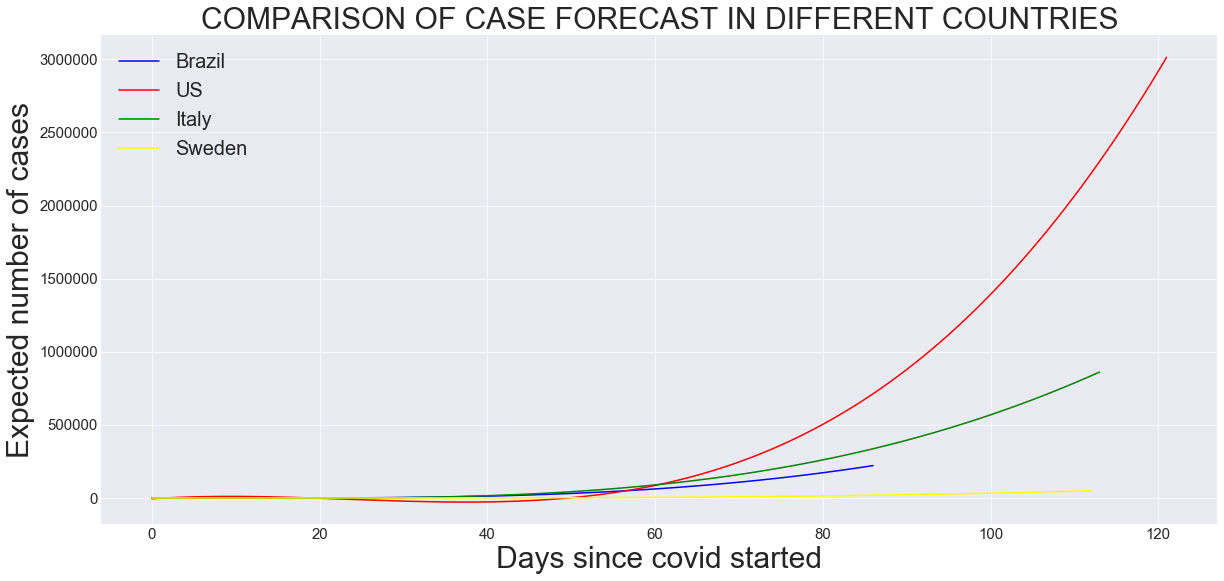

In [94]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')

plt.title('COMPARISON OF CASE FORECAST IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


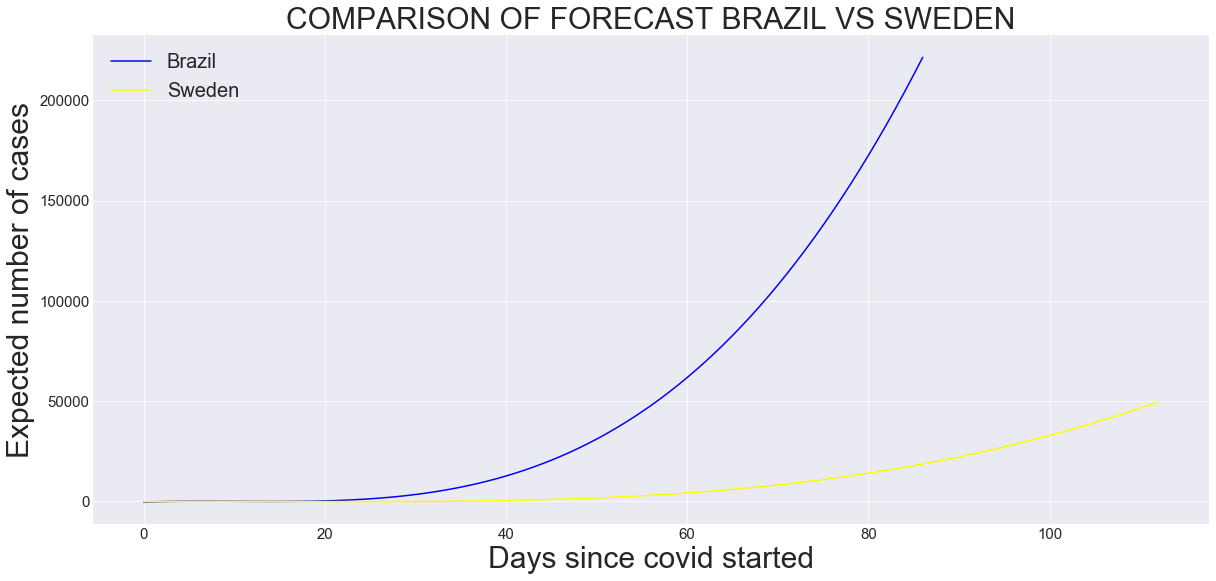

In [95]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')


plt.title('COMPARISON OF FORECAST BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


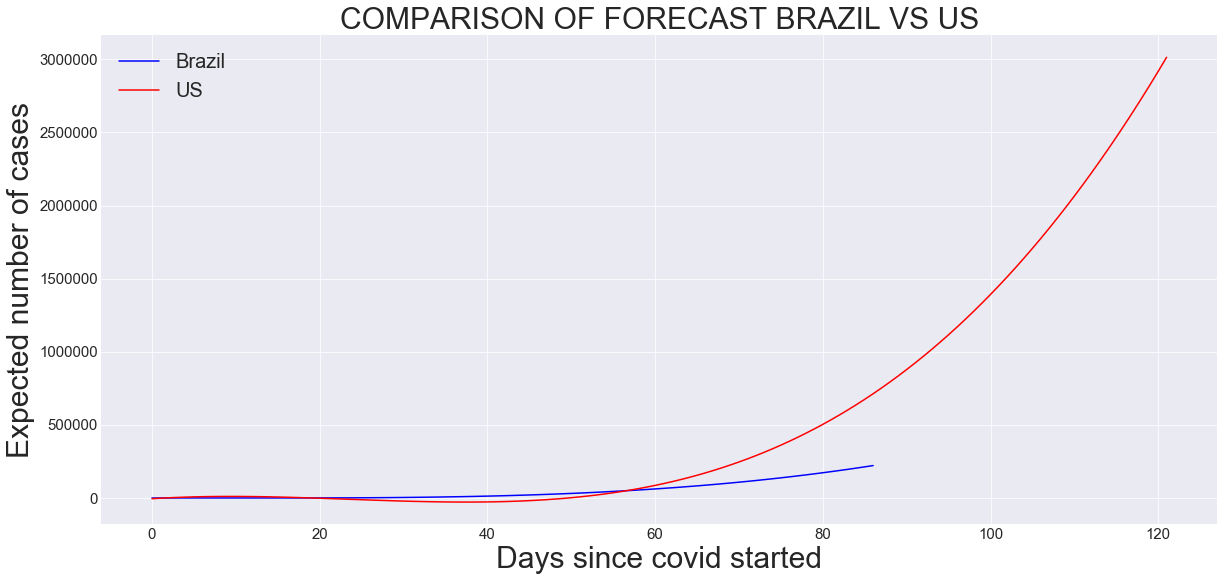

In [96]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')

plt.title('COMPARISON OF FORECAST BRAZIL VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['Brazil', 'US'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


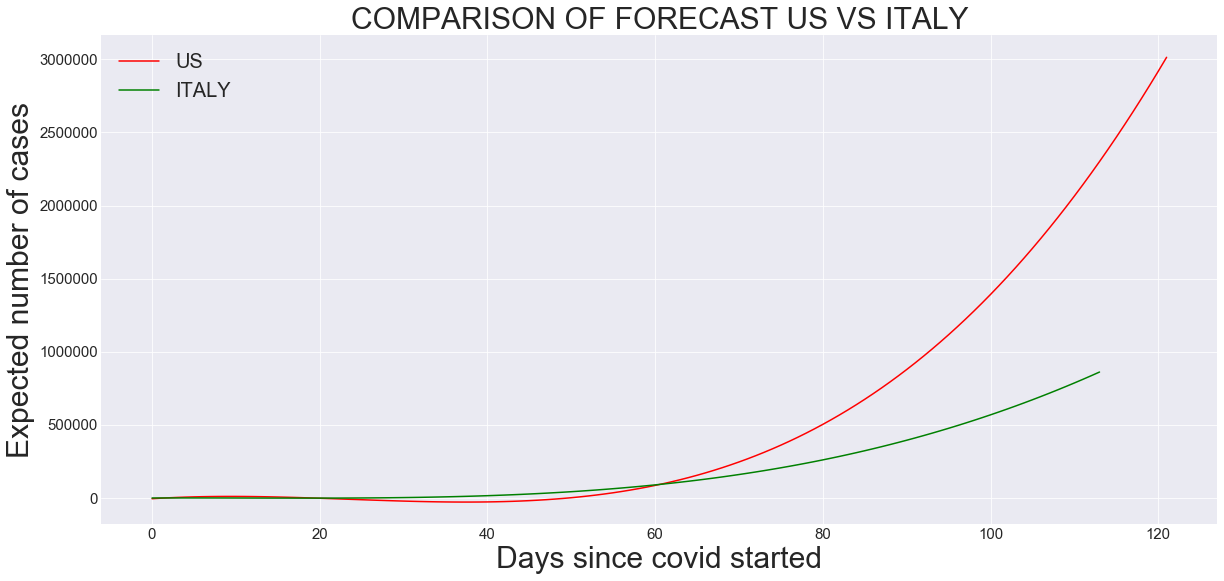

In [97]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')


plt.title('COMPARISON OF FORECAST US VS ITALY', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['US', 'ITALY'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


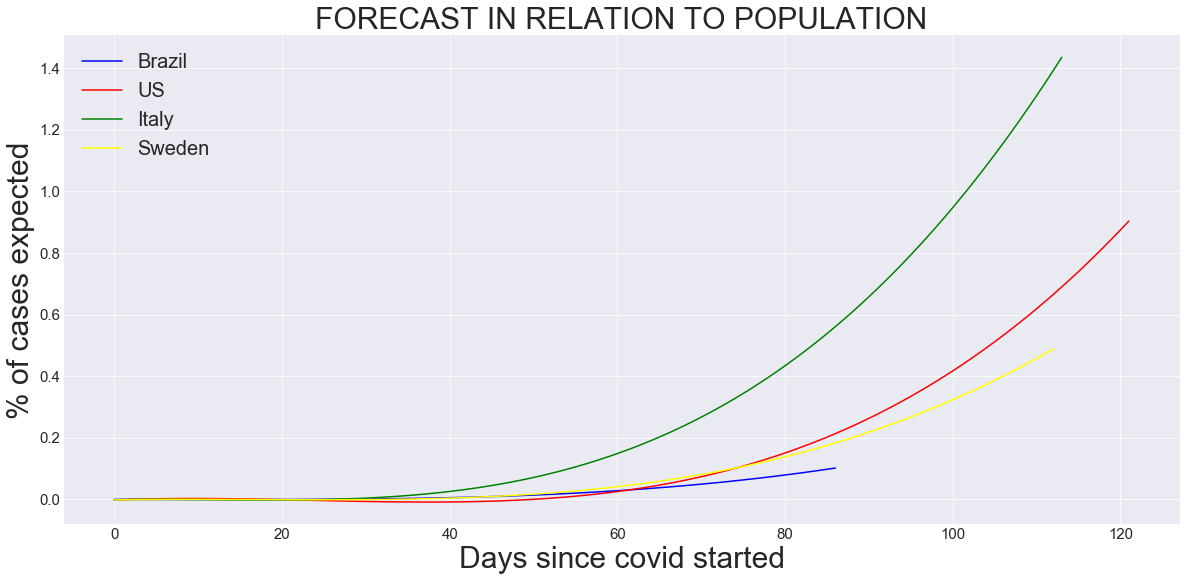

In [99]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_caso_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_caso_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_caso_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_caso_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('FORECAST IN RELATION TO POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of cases expected', size = 30)
plt.legend(['Brazil', 'US', 'Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


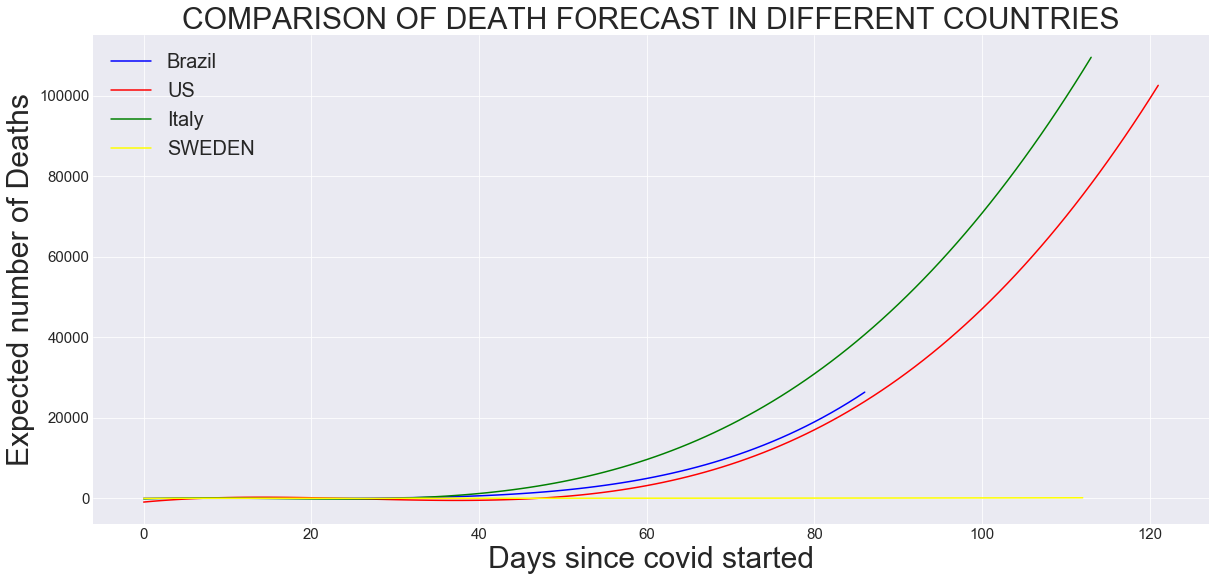

In [101]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARISON OF DEATH FORECAST IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Brazil', 'US','Italy', 'SWEDEN'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


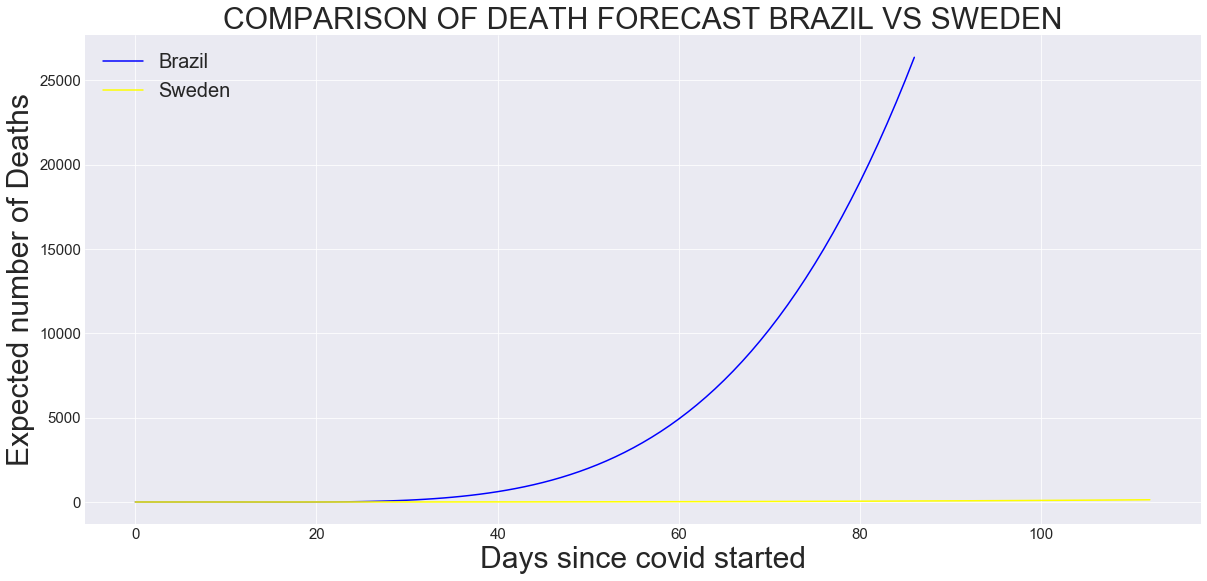

In [102]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARISON OF DEATH FORECAST BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


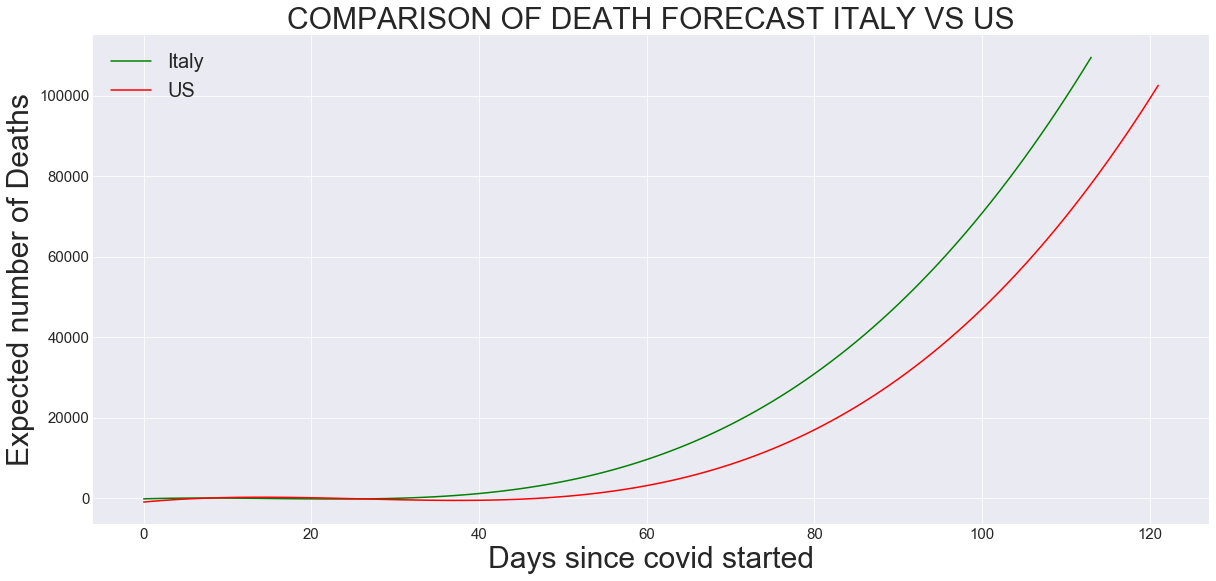

In [103]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_eua, pred_mortes_eua, color='red')

plt.title('COMPARISON OF DEATH FORECAST ITALY VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Italy', 'US'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


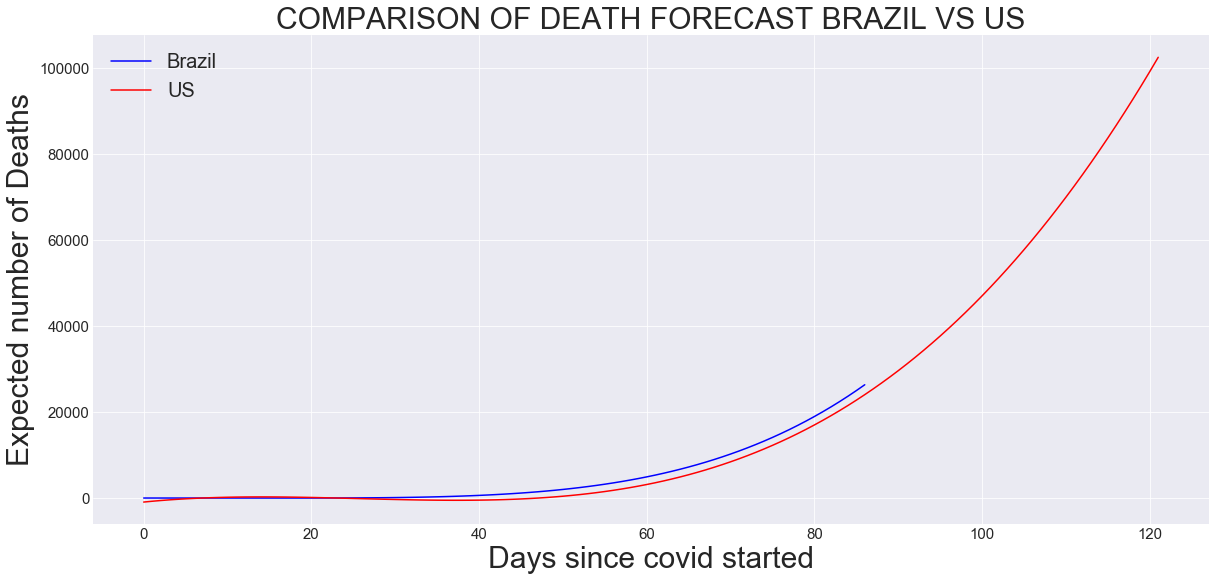

In [104]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')

plt.title('COMPARISON OF DEATH FORECAST BRAZIL VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Brazil', 'US'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


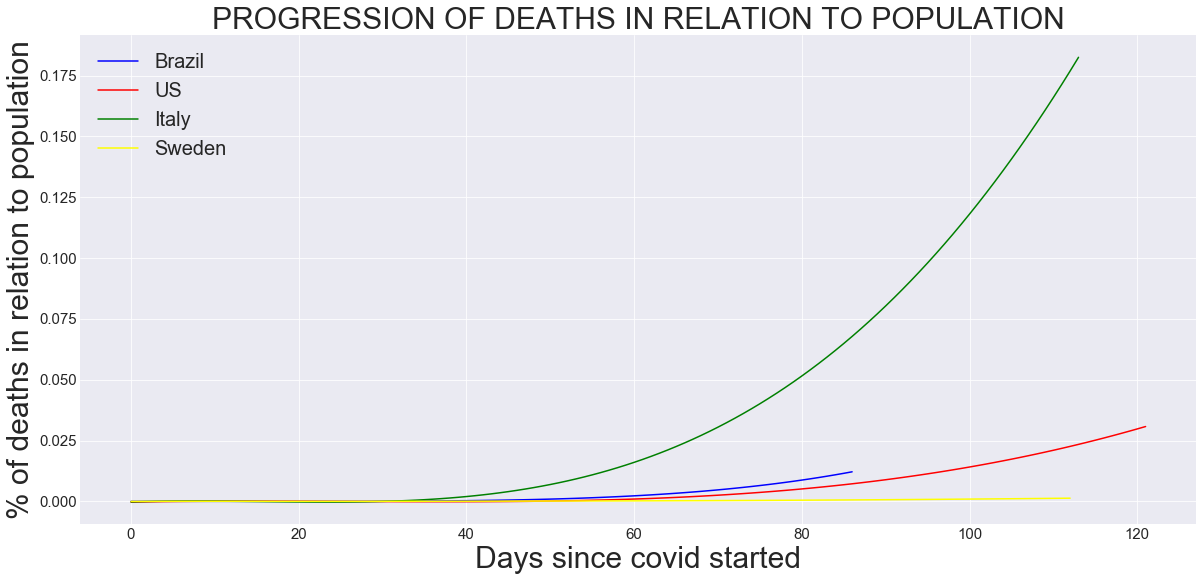

In [106]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_mortes_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('PROGRESSION OF DEATHS IN RELATION TO POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of deaths in relation to population', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()
